In [3]:
# library(sophisthse)
library(ggplot2)
library(forecast)
library(uroot)
library(urca)

In [4]:
library(lmtest)
library(dplyr)
library(broom)
library(strucchange)
library(tseries)
library(readxl)
library(TSA)
library(car)
library(zoo)
library(vars)

In [5]:
gdp2 = read.csv("gdp23.csv", dec = ",")

In [6]:
head(gdp2)

T      GDPEA_Q_DIRI GDPEA_Q_DIRI_SA GDPEA_C_Q
1 2003 I 100.0        107.9           2851.1   
2 II     107.4        109.1           3101.7   
3 III    117.9        110.7           3600.2   
4 IV     120.9        113.0           3655.2   
5 2004 I 107.2        115.6           3515.7   
6 II     116.0        117.9           3971.6

In [24]:
tail(gdp2)

T      GDPEA_Q_DIRI GDPEA_Q_DIRI_SA GDPEA_C_Q
75 III    180.5        176.3           34225.5  
76 IV     199.2        176.7           38783.3  
77 2022 I 161.0        175.5           34629.2  
78 II     161.9        172.5           34663.6  
79 III    173.8        171.5           36828.8  
80 IV     192.5        171.3                NA

In [20]:
gdp <-  ts(data = gdp2[1:(dim(gdp2)[1]-4), "GDPEA_Q_DIRI"], start = c(2003,1), frequency = 4 ) 

# gdp <-  ts(data = gdp2[(4*6):(dim(gdp2)[1]-4), "GDPEA_Q_DIRI"], start = c(2009,1), frequency = 4 ) 
gdp_test <-  ts(data = gdp2[1:(dim(gdp2)[1]-4), "GDPEA_Q_DIRI"], start = c(2022,1), frequency = 4 )  

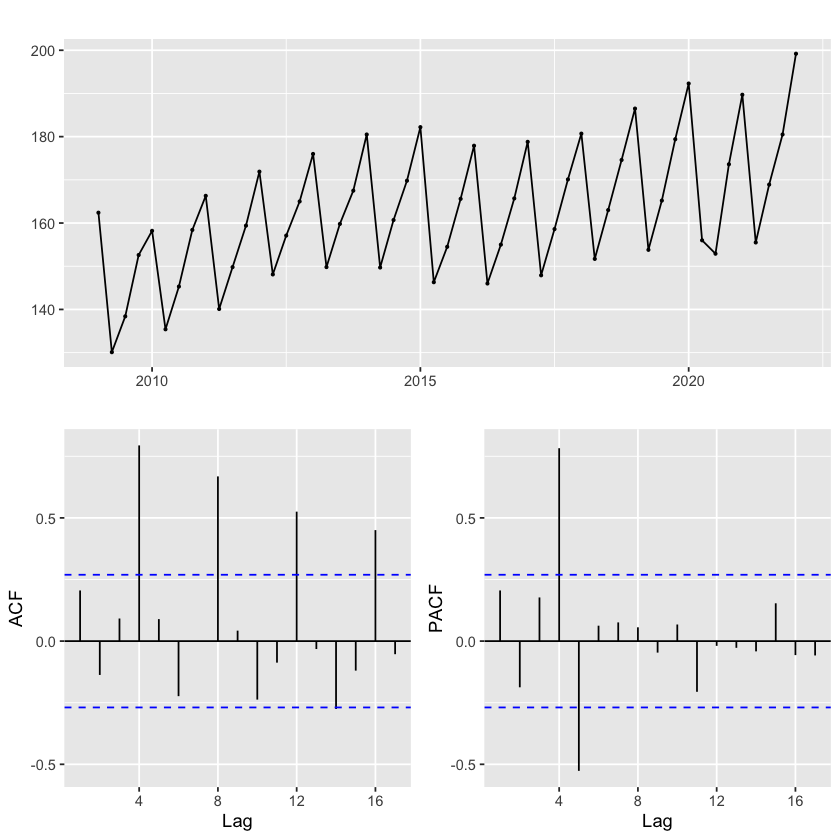

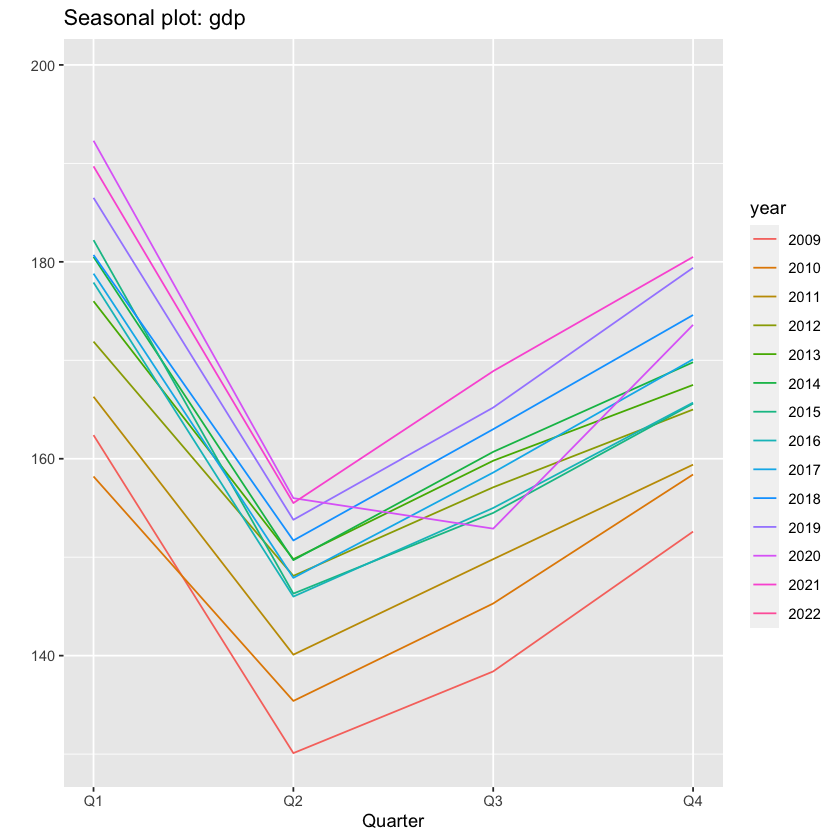

In [14]:
ggtsdisplay(gdp, main="") 
ggseasonplot(gdp)  

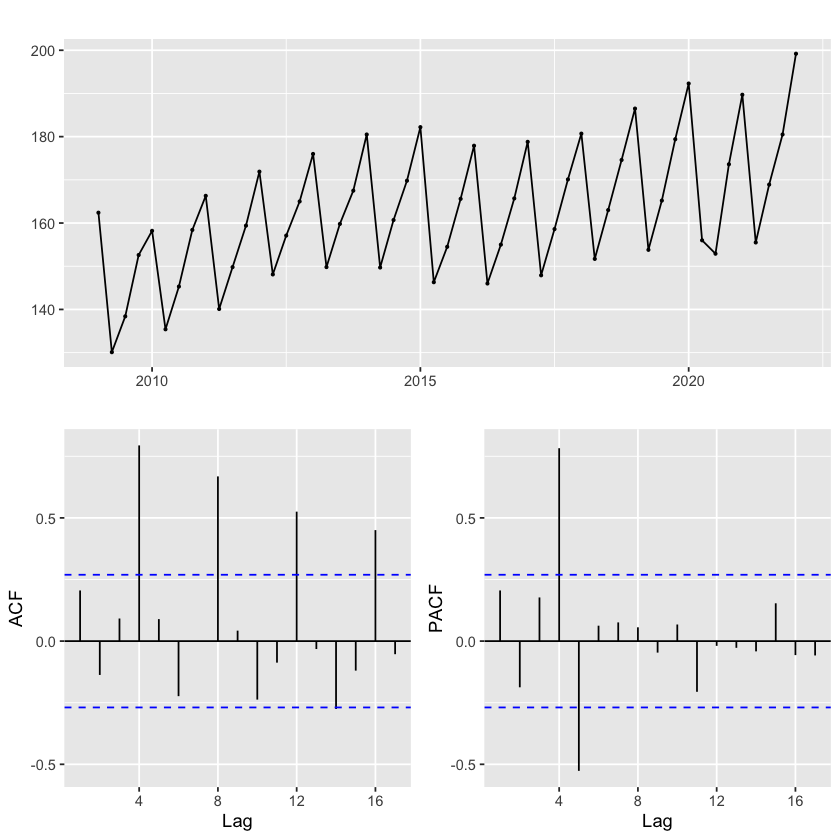

In [16]:
ggtsdisplay(gdp, main="")

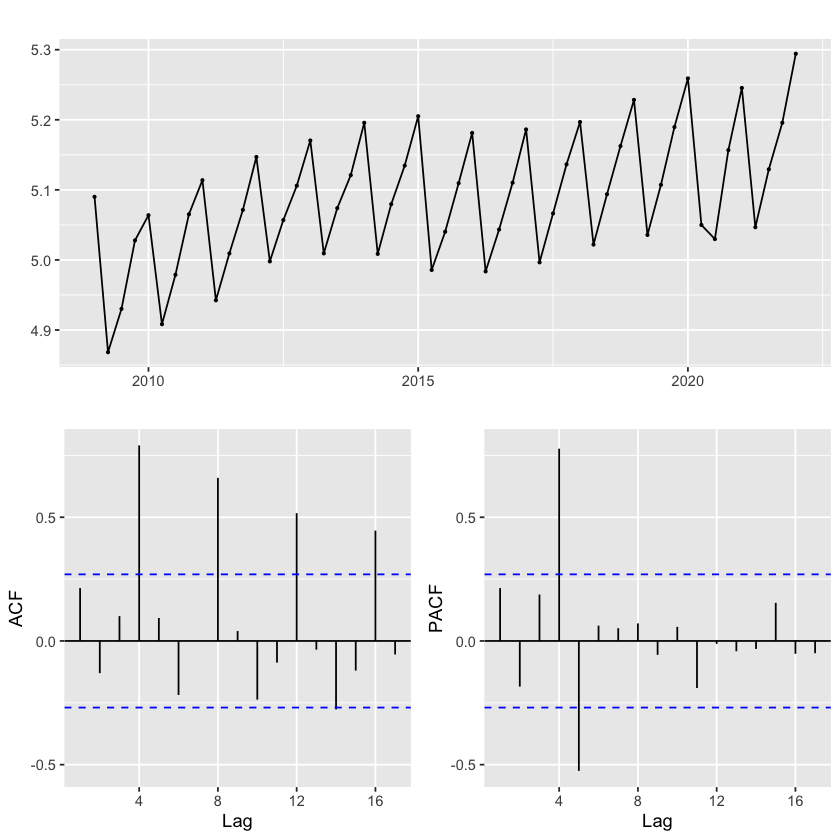

In [15]:
ggtsdisplay(log(gdp), main="")

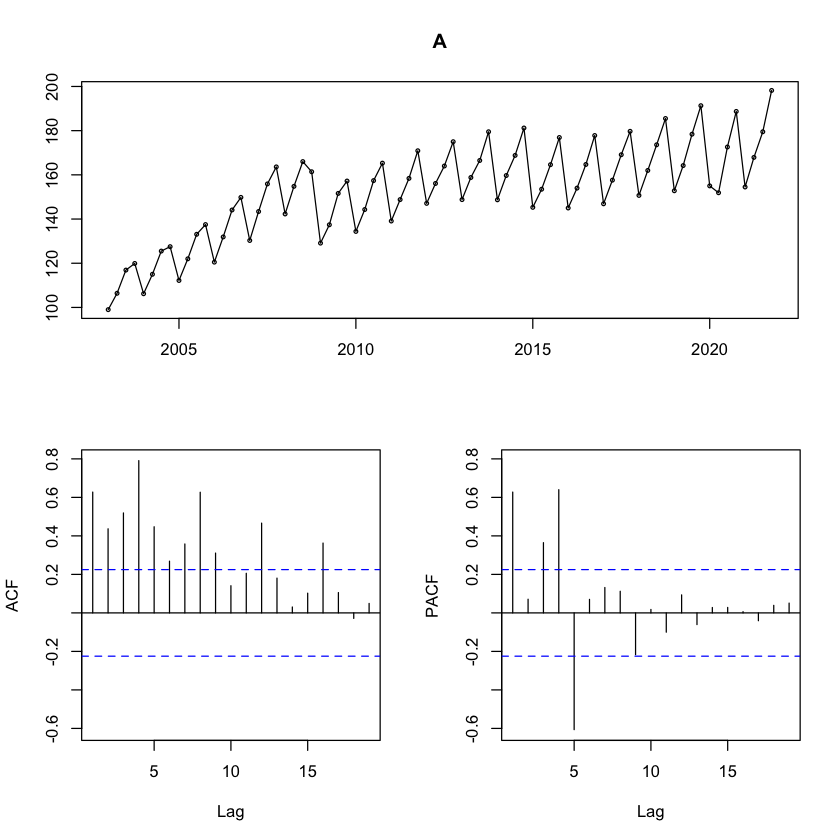

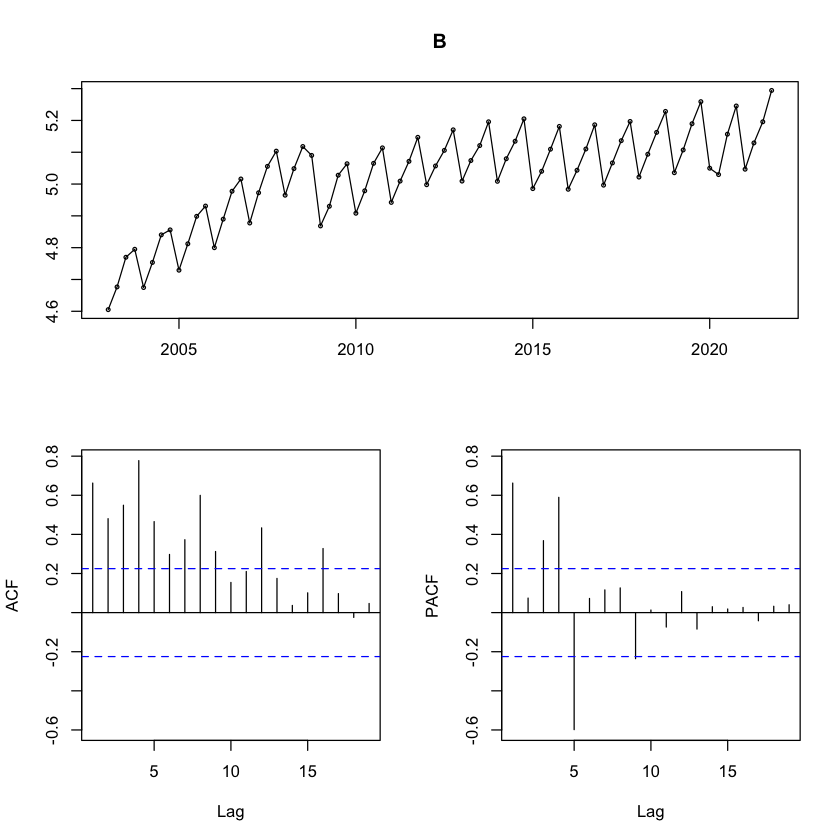

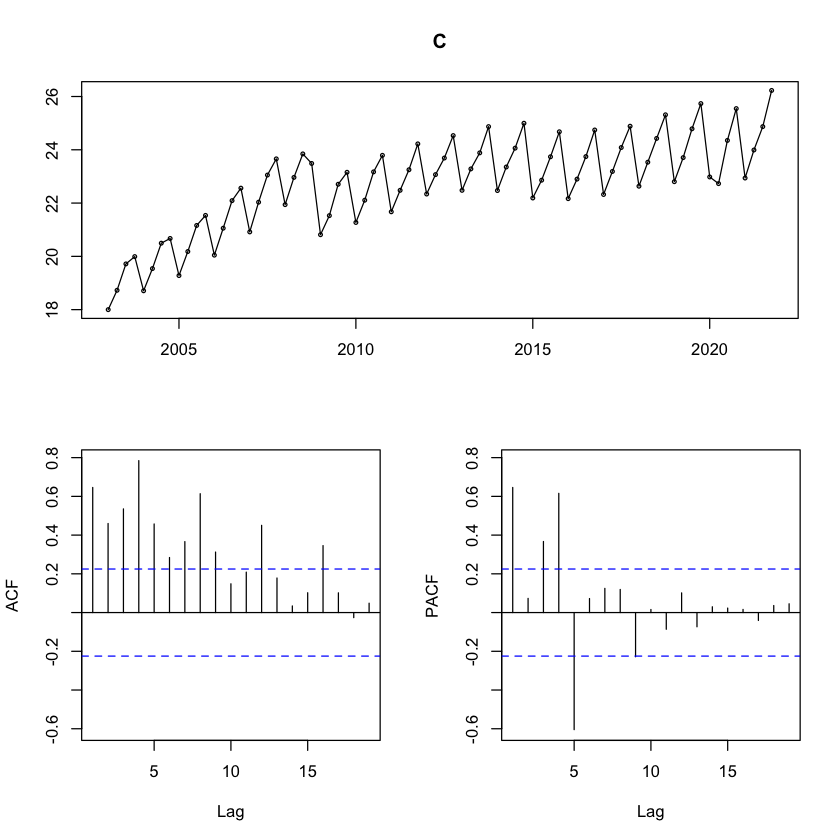

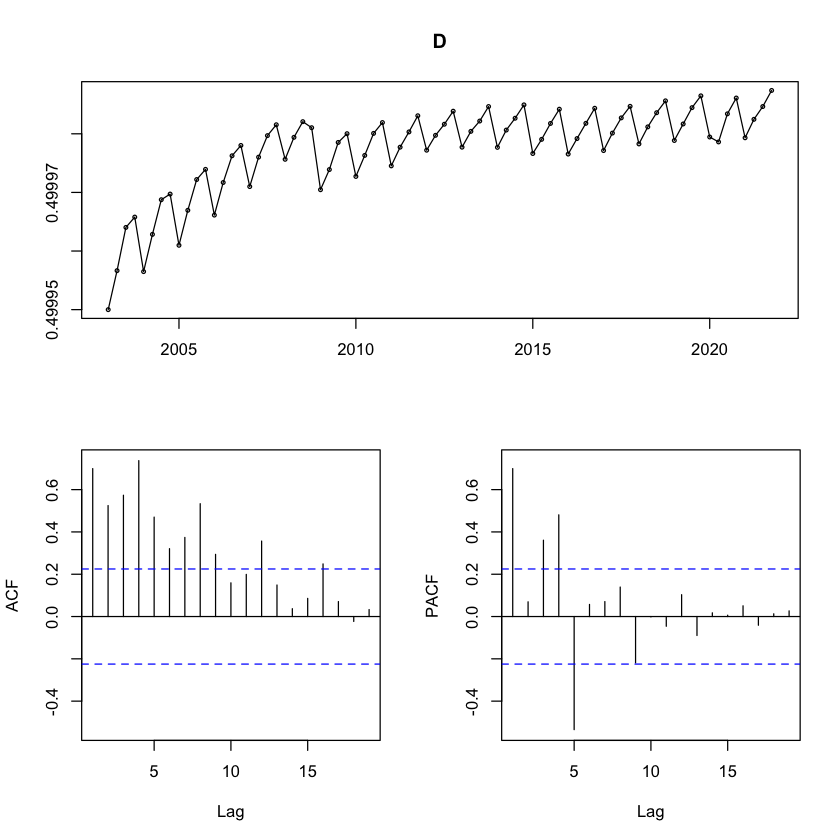

In [21]:
ts1 = gdp

A = BoxCox(ts1,1)
B = BoxCox(ts1,0)
C = BoxCox(ts1,0.5)
D = BoxCox(ts1,-2)

tsdisplay(A)
tsdisplay(B)
tsdisplay(C)
tsdisplay(D)

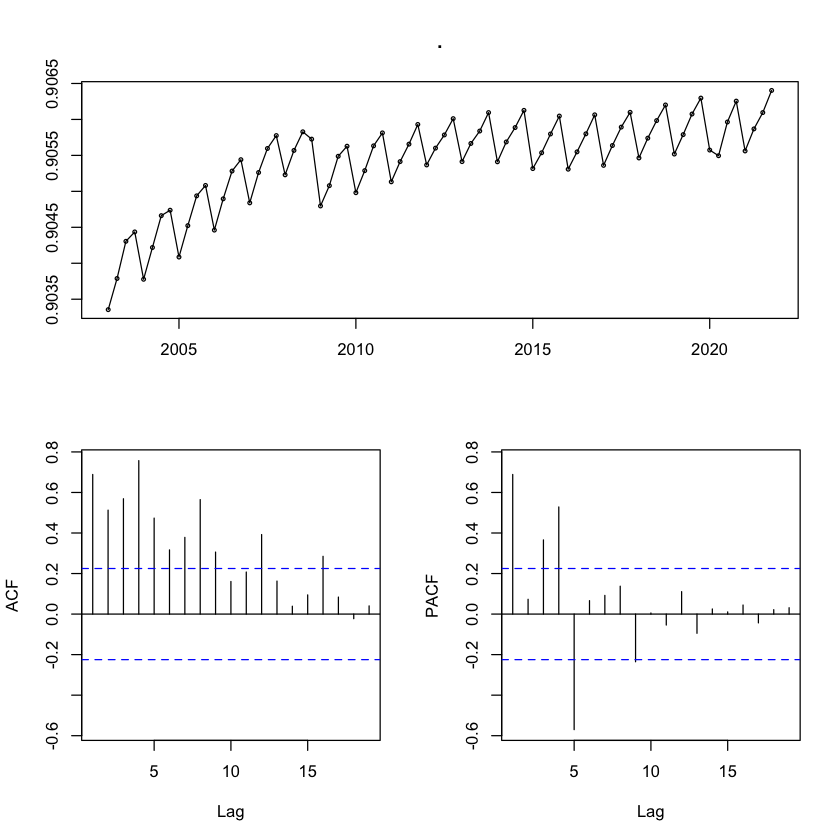

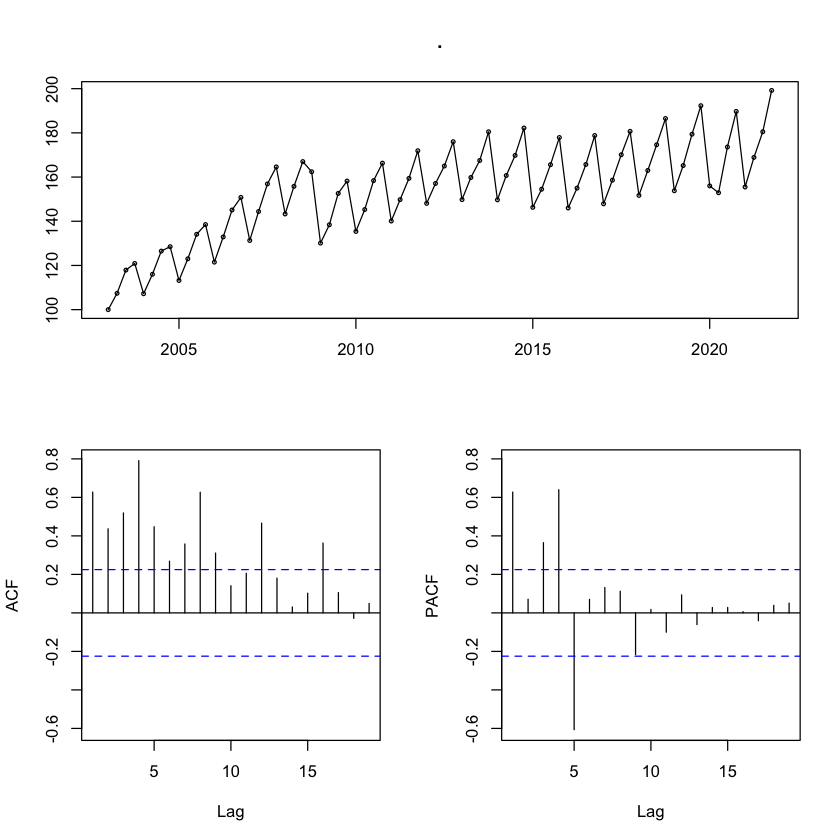

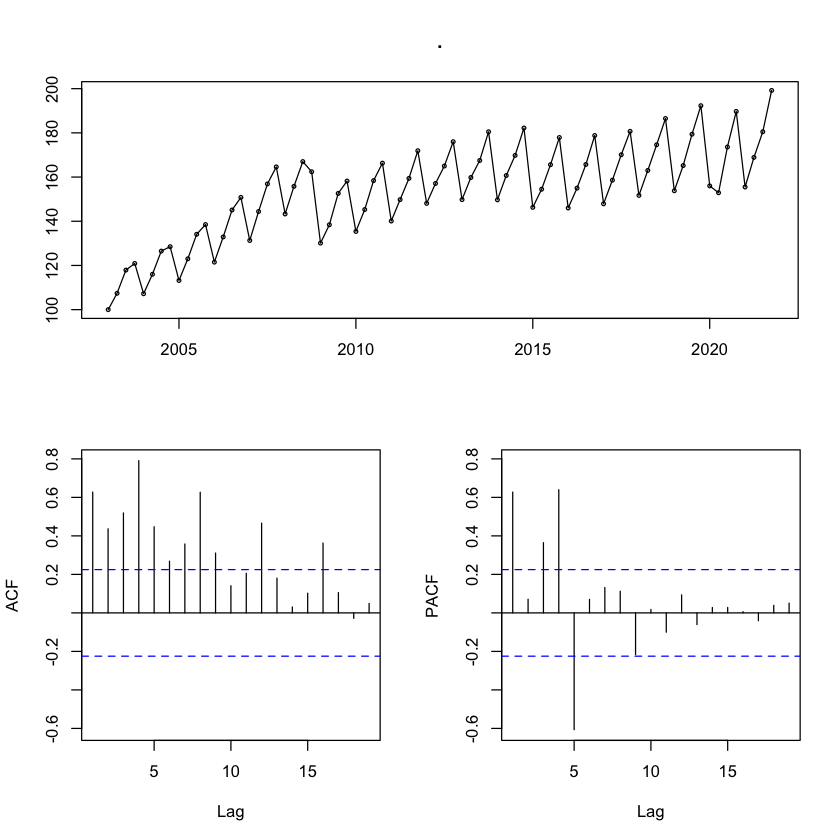

In [22]:
BoxCox(ts1,-1.1) %>% tsdisplay()
ts1 %>% tsdisplay()
BoxCox(ts1,-1.1) %>% InvBoxCox(-1.1) %>% tsdisplay()

In [26]:
summary(ur.df(gdp,  lags = 4)) 


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.4434  -1.0791   0.5957   2.2333  16.1909 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
z.lag.1      0.004436   0.003667   1.210  0.23078    
z.diff.lag1 -0.212419   0.081473  -2.607  0.01127 *  
z.diff.lag2 -0.210221   0.081341  -2.584  0.01197 *  
z.diff.lag3 -0.237108   0.080903  -2.931  0.00464 ** 
z.diff.lag4  0.791181   0.082235   9.621 3.48e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.283 on 66 degrees of freedom
Multiple R-squared:  0.9399,	Adjusted R-squared:  0.9354 
F-statistic: 206.6 on 5 and 66 DF,  p-value: < 2.2e-16


Value of test-statistic is: 1.2095 

Critical values for test statistics: 
     1pct  5pct 

In [25]:
summary(ur.df(gdp, type='trend', lags = 8,  selectlags = "BIC")) 


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.884  -1.797   0.357   2.258  14.136 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 43.81967   11.17143   3.922 0.000228 ***
z.lag.1     -0.32260    0.08435  -3.824 0.000315 ***
tt           0.17917    0.05682   3.153 0.002521 ** 
z.diff.lag1 -0.01470    0.09903  -0.148 0.882508    
z.diff.lag2 -0.09234    0.08899  -1.038 0.303608    
z.diff.lag3 -0.20229    0.08265  -2.448 0.017321 *  
z.diff.lag4  0.74182    0.08266   8.975 1.09e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.991 on 60 degrees of freedom
Multiple R-squared:  0.9513,	Adjusted R-squared:  0.9464 
F-statistic: 195.3 on 6 and 60 DF,  p-value: < 2.2e-

In [27]:
hegy.test(gdp,  deterministic = c(1,1,1))


	HEGY test for unit roots

data:  gdp

      statistic p-value    
t_1     -2.7954  0.1605    
t_2     -3.1436  0.0173 *  
F_3:4   18.2396       0 ***
F_2:4   22.2511       0 ***
F_1:4   19.8759       0 ***
---
Signif. codes: 0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1 

Deterministic terms: constant + trend + seasonal dummies 
Lag selection criterion and order: fixed, 0
P-values: based on response surface regressions 

In [29]:
gdp_diff <- diff(gdp) # взяв первую разность, мы не решили проблему с нестационарностью, остался сезонный едичный корень 

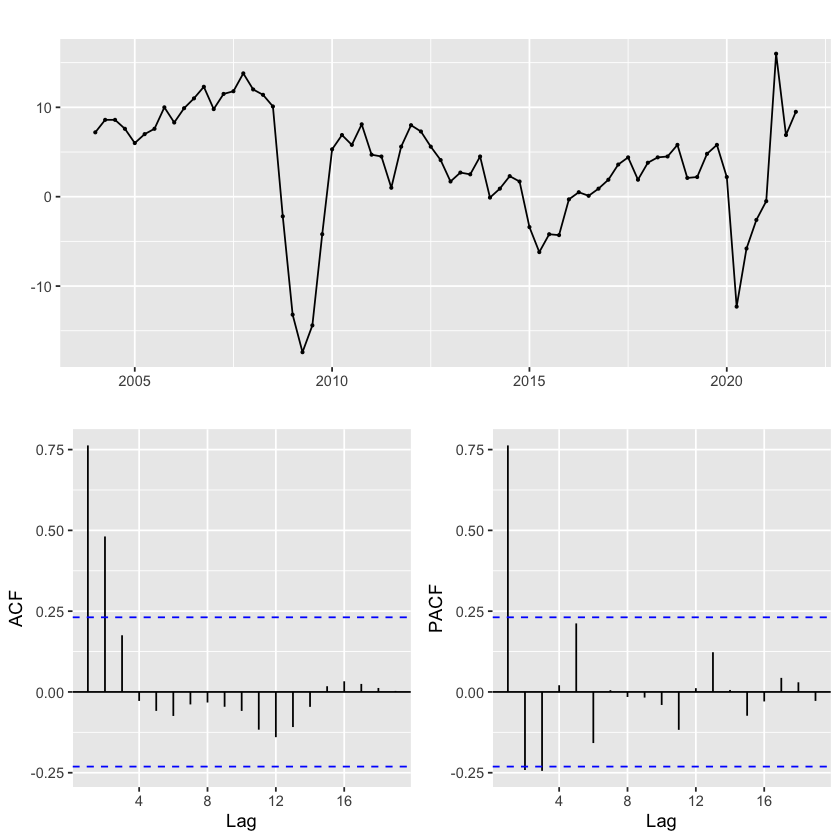

In [37]:
ggtsdisplay(gdp_diff)

In [33]:
gdp_diff <- diff(diff(gdp), 4)

In [36]:
gdp_diff <- diff(gdp, 4)

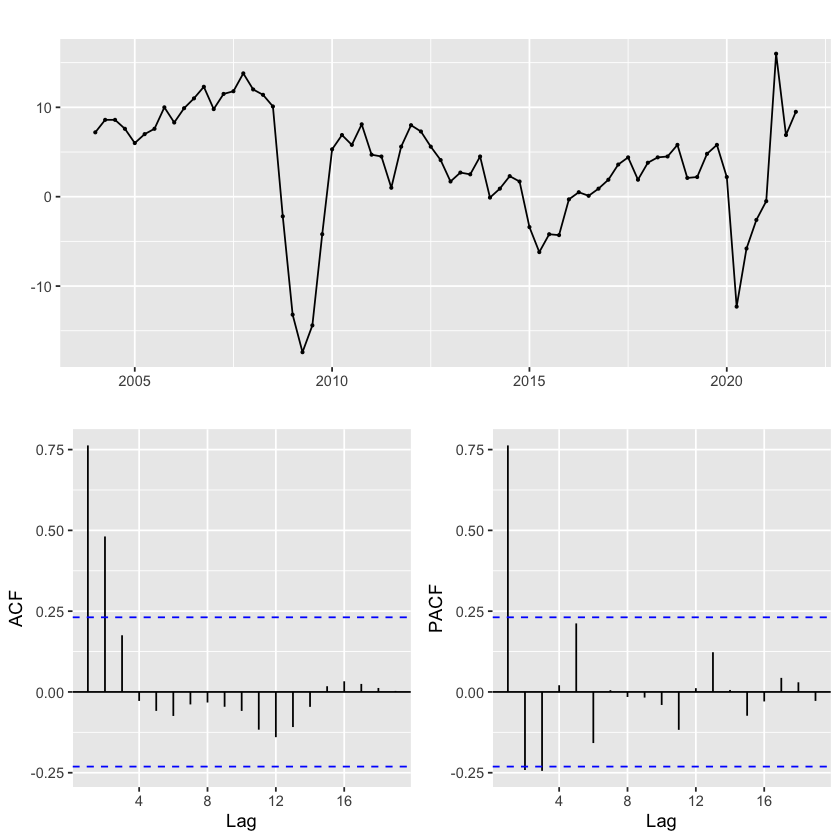

In [32]:
ggtsdisplay(gdp_diff)

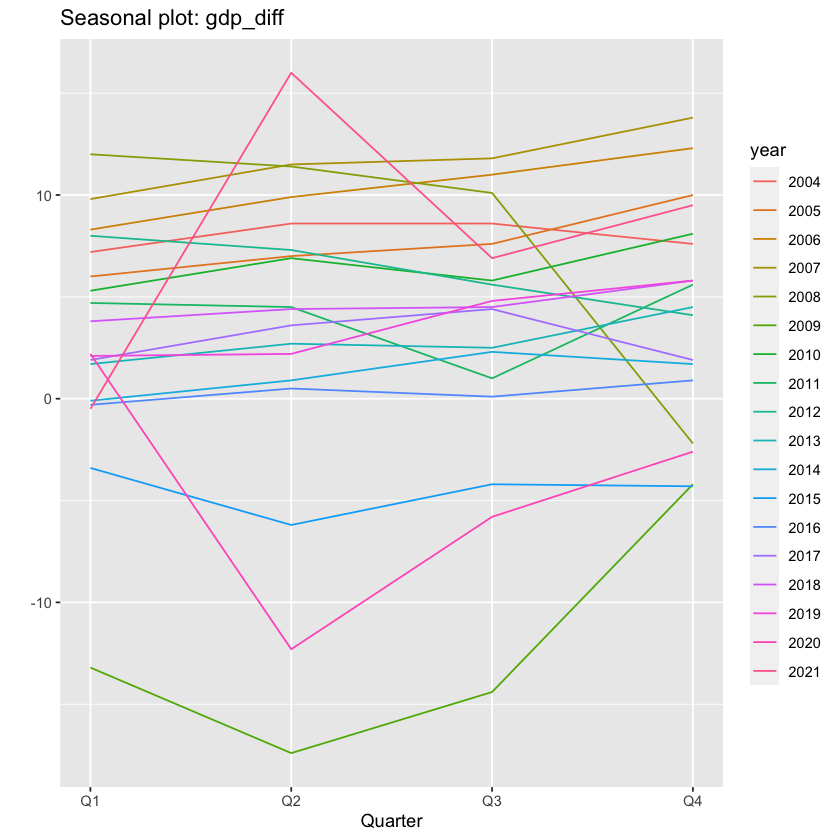

In [38]:
ggseasonplot(gdp_diff)  

In [39]:
model_gdp <- auto.arima(gdp) 

In [40]:
summary(model_gdp)

Series: gdp 
ARIMA(0,1,0)(0,1,1)[4] 

Coefficients:
         sma1
      -0.4852
s.e.   0.1030

sigma^2 = 15.75:  log likelihood = -198.64
AIC=401.28   AICc=401.45   BIC=405.8

Training set error measures:
                      ME     RMSE      MAE        MPE     MAPE      MASE
Training set -0.04654456 3.808467 2.536769 -0.1021622 1.638387 0.4150134
                   ACF1
Training set 0.03942103

In [42]:
model_gdp <- auto.arima(gdp_diff) 

In [43]:
summary(model_gdp)

Series: gdp_diff 
ARIMA(0,1,0)(0,0,1)[4] 

Coefficients:
         sma1
      -0.4852
s.e.   0.1030

sigma^2 = 15.75:  log likelihood = -198.64
AIC=401.28   AICc=401.45   BIC=405.8

Training set error measures:
                      ME     RMSE      MAE      MPE     MAPE      MASE
Training set -0.04732807 3.912727 2.672809 91.39279 144.3425 0.4602457
                   ACF1
Training set 0.03968226

In [44]:
model_gdp <- Arima(gdp, order = c(1,0,1), seasonal = c(0,1,0),  include.drift=F,  method = "ML")

In [45]:
summary(model_gdp)

Series: gdp 
ARIMA(1,0,1)(0,1,0)[4] 

Coefficients:
         ar1     ma1
      0.7682  0.1894
s.e.  0.0871  0.1247

sigma^2 = 17.54:  log likelihood = -204.86
AIC=415.73   AICc=416.08   BIC=422.56

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.728104 4.019105 2.687921 0.4644187 1.749823 0.4397417
                      ACF1
Training set -0.0009909965


	Ljung-Box test

data:  Residuals from ARIMA(1,0,1)(0,1,0)[4]
Q* = 10.517, df = 6, p-value = 0.1045

Model df: 2.   Total lags used: 8



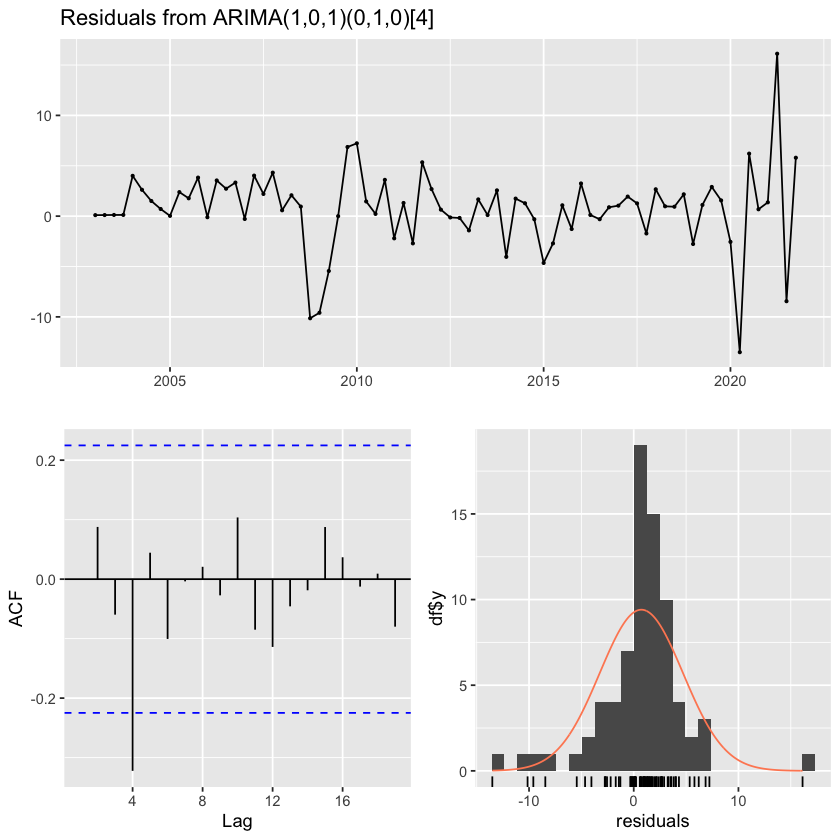

In [46]:
checkresiduals(model_gdp)

In [47]:
future_gdp <- forecast(model_gdp, h = 4)

In [48]:
future_gdp

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2022 Q1       163.8962 158.5293 169.2631 155.6883 172.1042
2022 Q2       175.3501 167.9193 182.7809 163.9857 186.7145
2022 Q3       185.4550 177.0405 193.8696 172.5862 198.3239
2022 Q4       203.0065 194.0621 211.9510 189.3272 216.6859

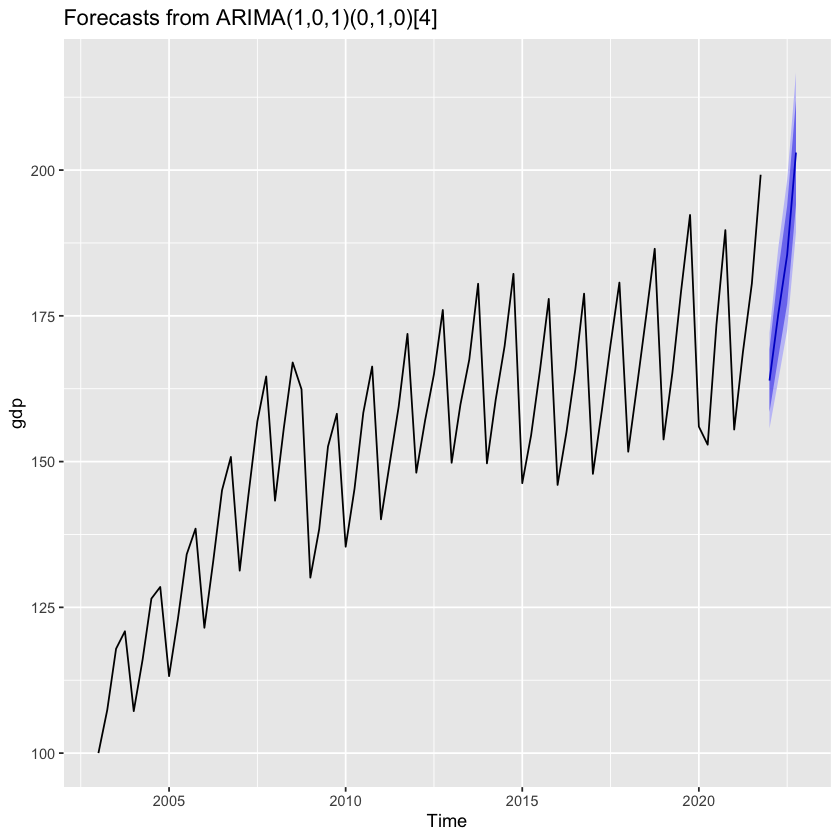

In [50]:
autoplot(future_gdp)

In [51]:
model_gdp <- Arima(gdp, order = c(1,0,1), seasonal = c(0,1,0),  include.drift=F,  method = "ML")

In [52]:
future_gdp1 = forecast(model_gdp, h = 4)
accuracy(future_gdp1, gdp_test)

ME         RMSE      MAE       MPE         MAPE      MASE      
Training set   0.728104  4.019105  2.687921   0.4644187  1.749823  0.4397417
Test set     -70.376978 70.719713 70.376978 -63.0939609 63.093961 11.5136160
             ACF1          Theil's U
Training set -0.0009909965       NA 
Test set     -0.0544031080 9.252073

In [53]:
model_gdp_bc <- Arima(gdp, order = c(1,0,1), seasonal = c(0,1,0),  include.drift=F,  method = "ML", lambda = -1.1)

In [54]:
future_gdp2 = forecast(model_gdp_bc, h = 4)
accuracy(future_gdp2, gdp_test)

ME         RMSE      MAE       MPE         MAPE      MASE      
Training set   1.227101  5.611407  3.370401   0.9954083  2.361728  0.5513948
Test set     -70.418406 70.908649 70.418406 -63.0254031 63.025403 11.5203936
             ACF1        Theil's U
Training set 0.184811047       NA 
Test set     0.009186423 9.347738

In [55]:
auto = auto.arima(gdp)

In [56]:
auto

Series: gdp 
ARIMA(0,1,0)(0,1,1)[4] 

Coefficients:
         sma1
      -0.4852
s.e.   0.1030

sigma^2 = 15.75:  log likelihood = -198.64
AIC=401.28   AICc=401.45   BIC=405.8

In [57]:
future_gdp3 = forecast(auto, h = 4)
accuracy(future_gdp3, gdp_test)

ME           RMSE      MAE       MPE         MAPE      MASE      
Training set  -0.04654456  3.808467  2.536769  -0.1021622  1.638387  0.4150134
Test set     -71.32072323 71.697760 71.320723 -63.9012550 63.901255 11.6680120
             ACF1       Theil's U
Training set 0.03942103       NA 
Test set     0.09802068 9.348753

In [58]:
future_gdp4 = snaive(gdp, h=4)
accuracy(future_gdp4, gdp_test)

ME         RMSE      MAE     MPE        MAPE      MASE    
Training set   3.581944  7.371237  6.1125   2.398757  4.087769  1.00000
Test set     -64.475000 65.023361 64.4750 -57.655670 57.655670 10.54806
             ACF1       Theil's U
Training set 0.76295860       NA 
Test set     0.02237962 8.597079

In [60]:
# autoplot(future_gdp1)
# autoplot(future_gdp2)
# autoplot(future_gdp3)

In [61]:
options(repr.plot.width=15, repr.plot.height=8)


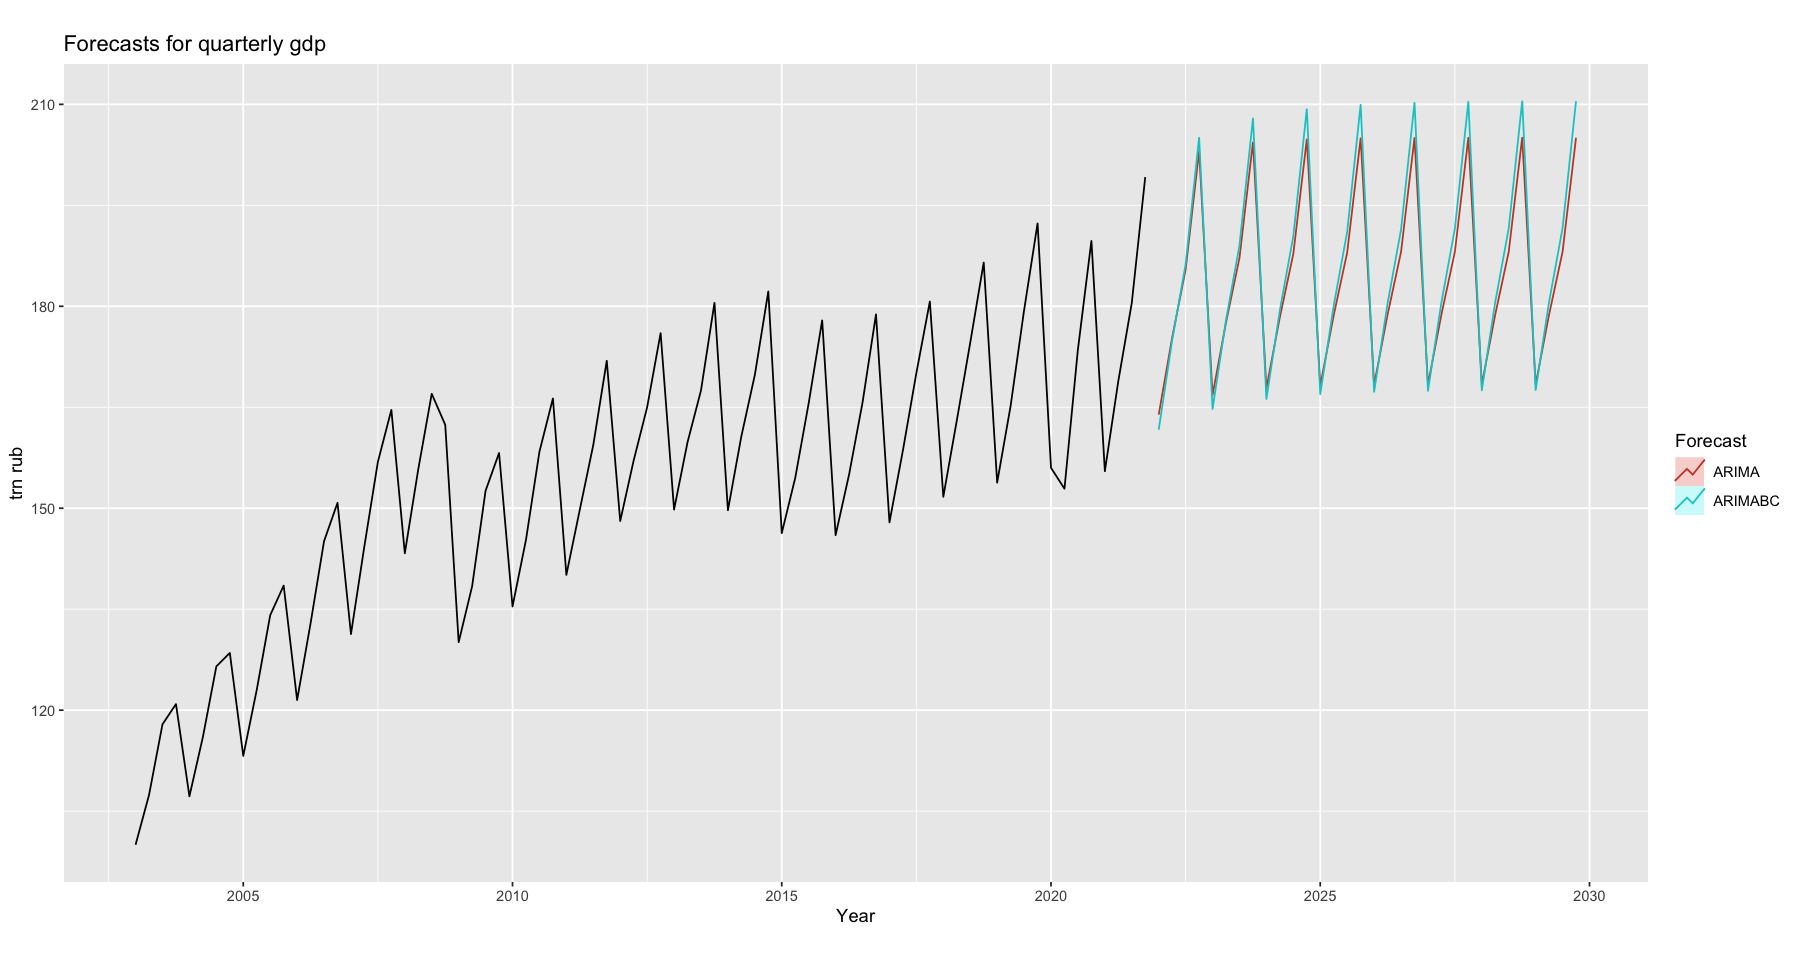

In [67]:
n_quart = 32

# Set training data from 1992 to 2007
gdp2 <- gdp
# Plot some forecasts
autoplot(gdp) +
  autolayer(forecast(model_gdp, h = n_quart),
    series="ARIMA", PI=FALSE) +
  autolayer(forecast(model_gdp_bc, h = n_quart),
    series="ARIMABC", PI=FALSE) +
  # autolayer(forecast(auto, h = n_quart),
    # series="Auto", PI=FALSE) +
  # autolayer(meanf(gdp, h=n_quart),
    # series="Mean", PI=FALSE) +
  # autolayer(naive(gdp, h=n_quart),
    # series="Naïve", PI=FALSE) +
  # autolayer(snaive(gdp, h=n_quart),
    # series="Seasonal naïve", PI=FALSE) +
  ggtitle("Forecasts for quarterly gdp") +
  xlab("Year") + ylab("trn rub") +  coord_fixed(ratio=1/8) +
  guides(colour=guide_legend(title="Forecast"))

In [68]:
inv1 = read.csv("inv23.csv",dec = ',')

In [69]:
head(inv1)

T      INVFC_Q
1 1993 I  1.6   
2 II      3.8   
3 III     6.2   
4 IV     15.6   
5 1994 I 12.3   
6 II     22.1

In [70]:
inv <- ts(data = inv1[29:(dim(inv1)[1]-4),2], start = c(1993,1), frequency = 4) 


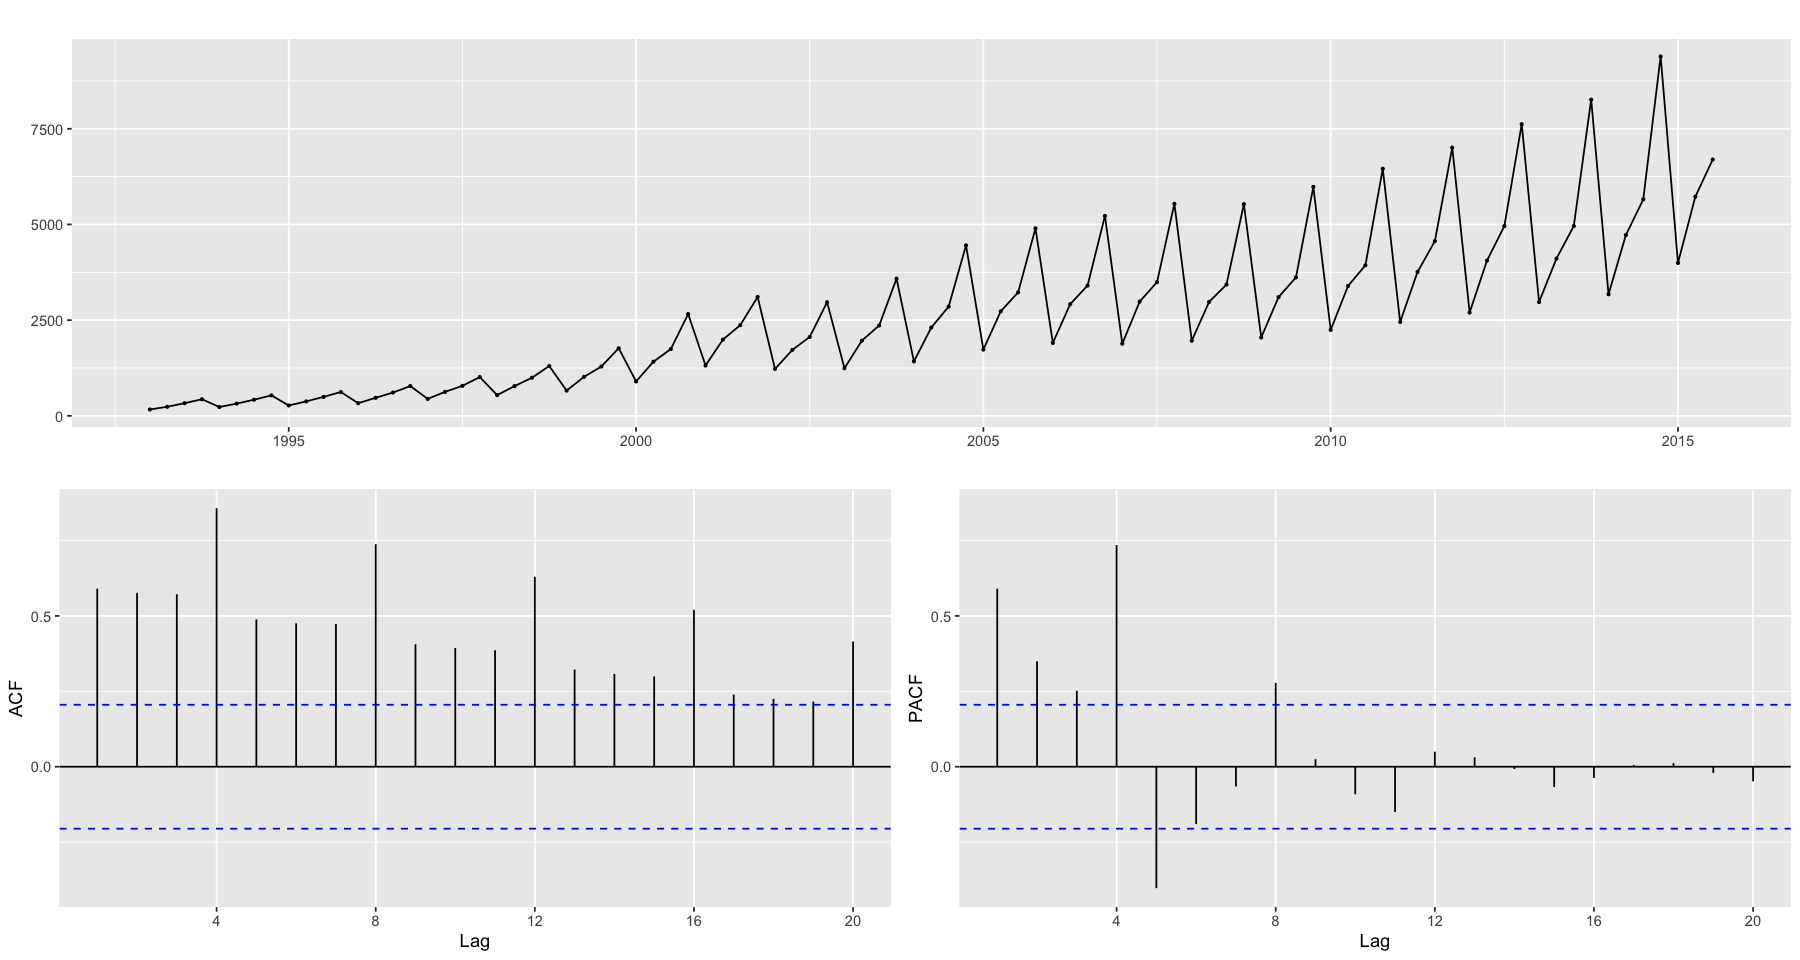

In [71]:
ggtsdisplay(inv, main="") 

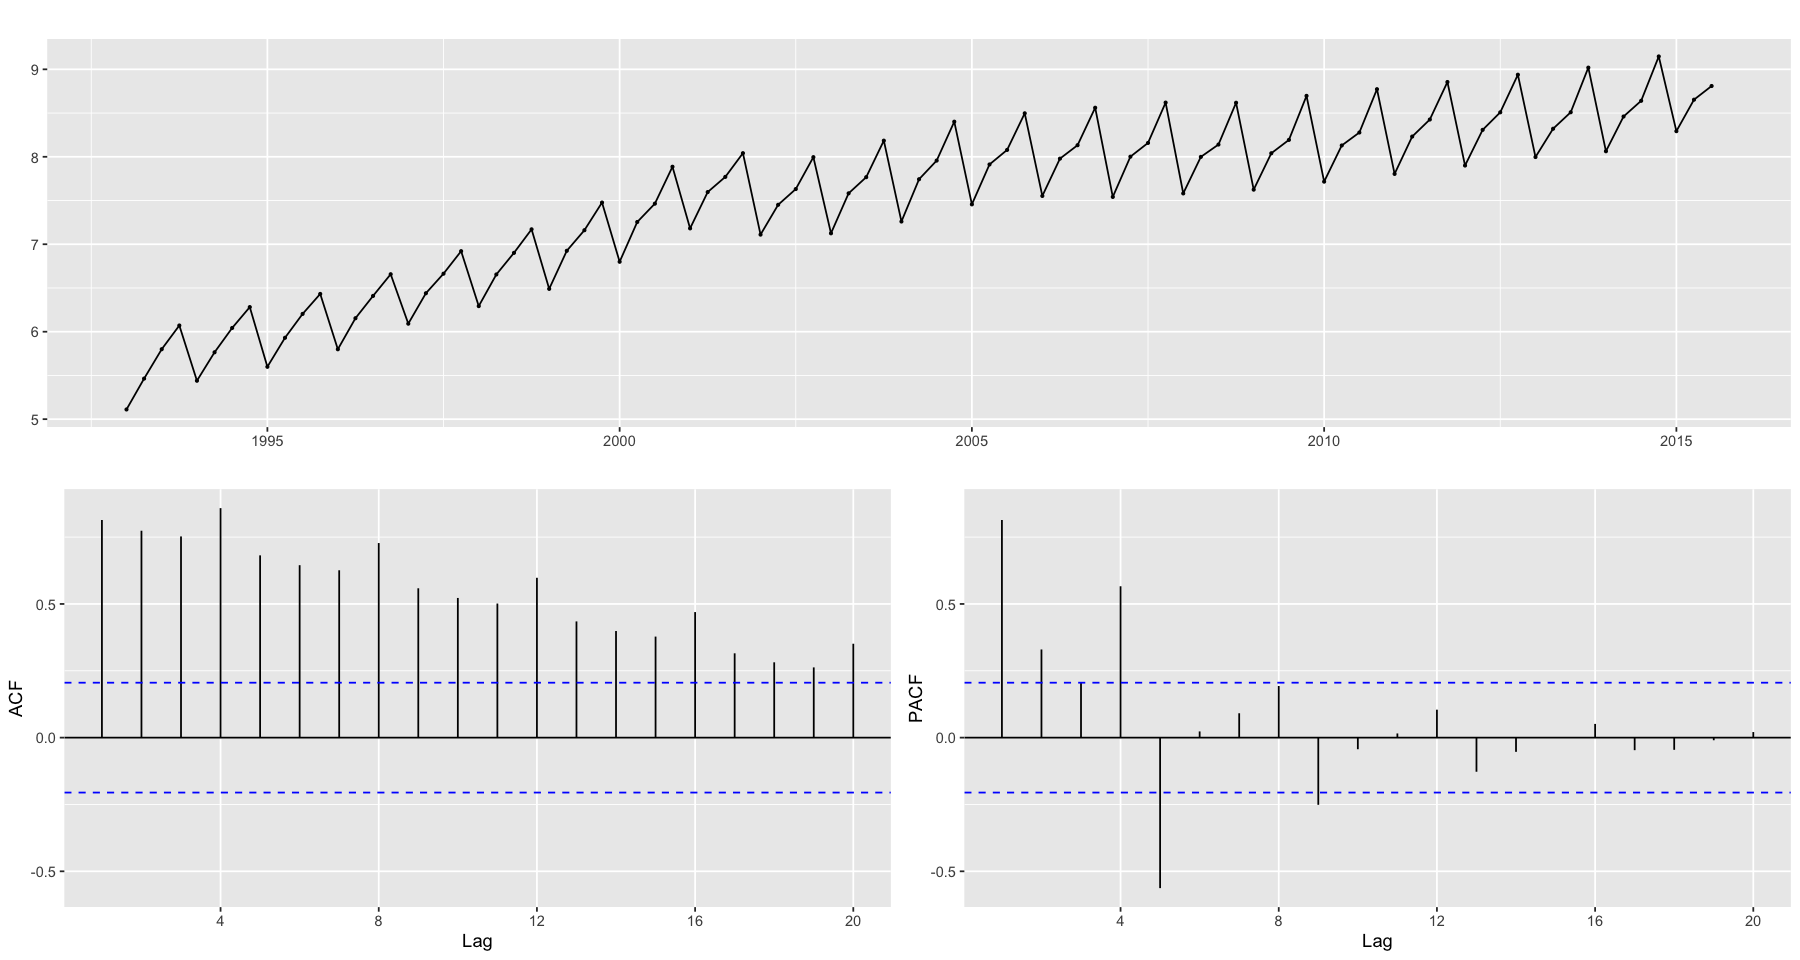

In [72]:
inv_log <- log(inv)
ggtsdisplay(inv_log, main="")

In [73]:

inv <- ts(data = inv1[29:(dim(inv1)[1]-4), 2] , start = c(2000,1), frequency = 4) 



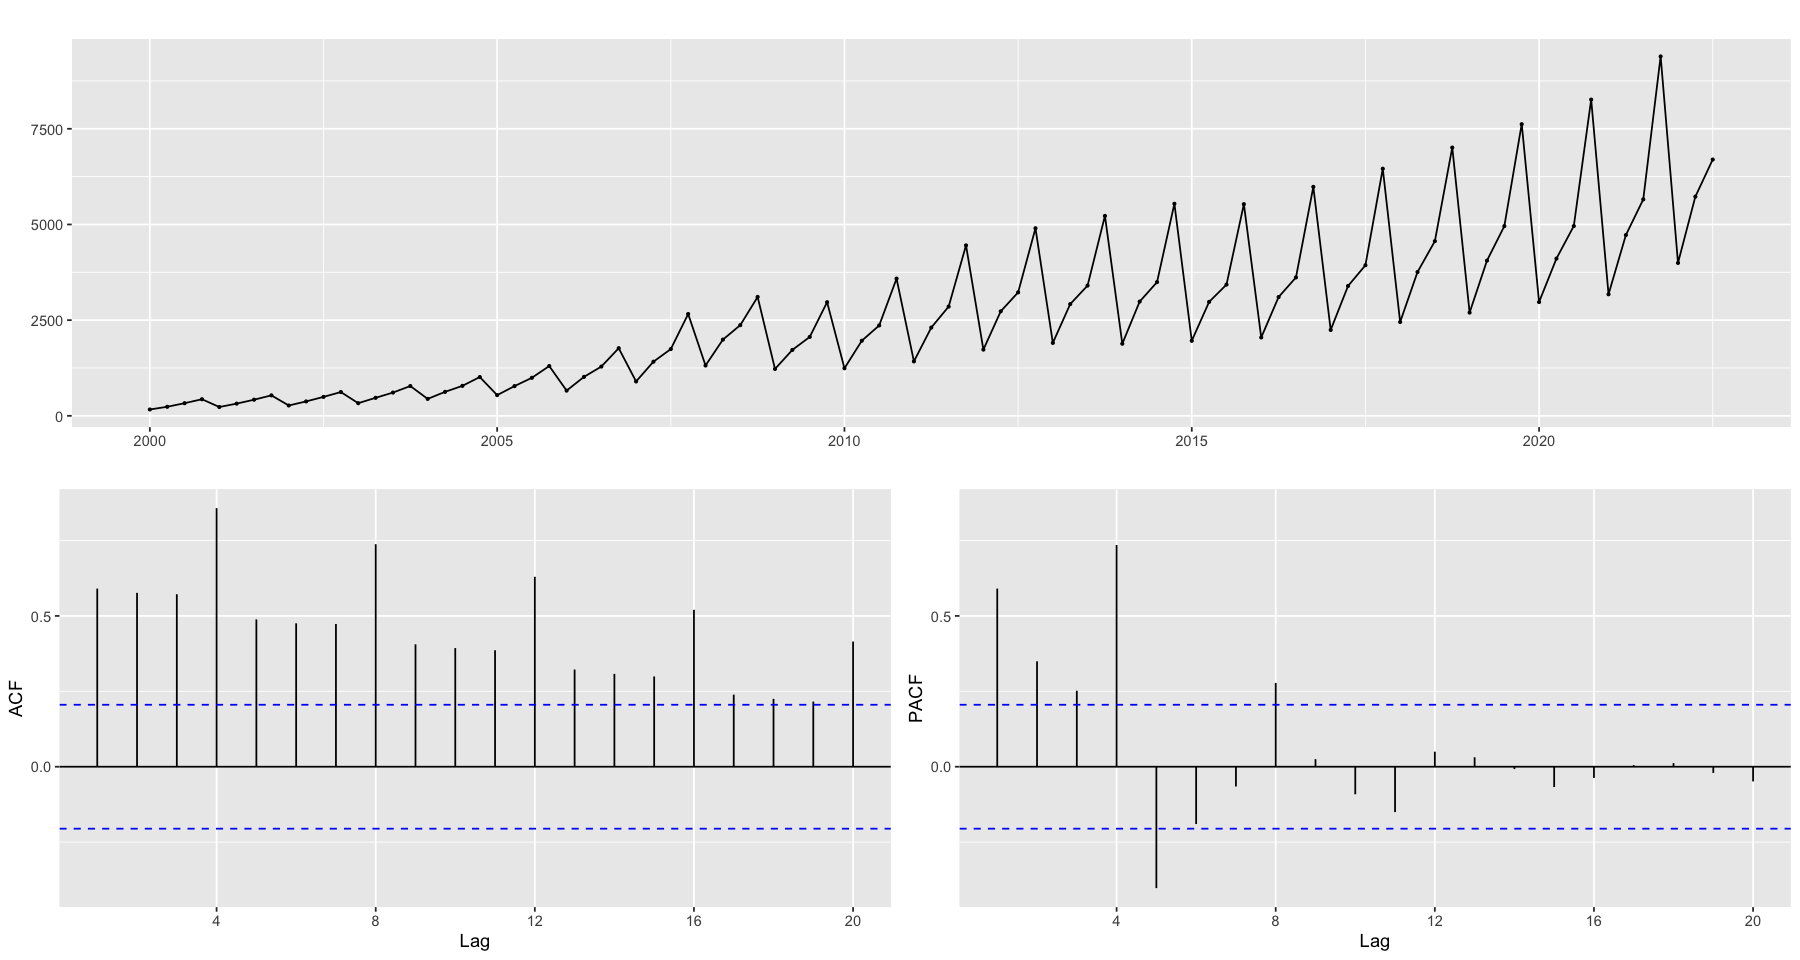

In [74]:
ggtsdisplay(inv, main="") 

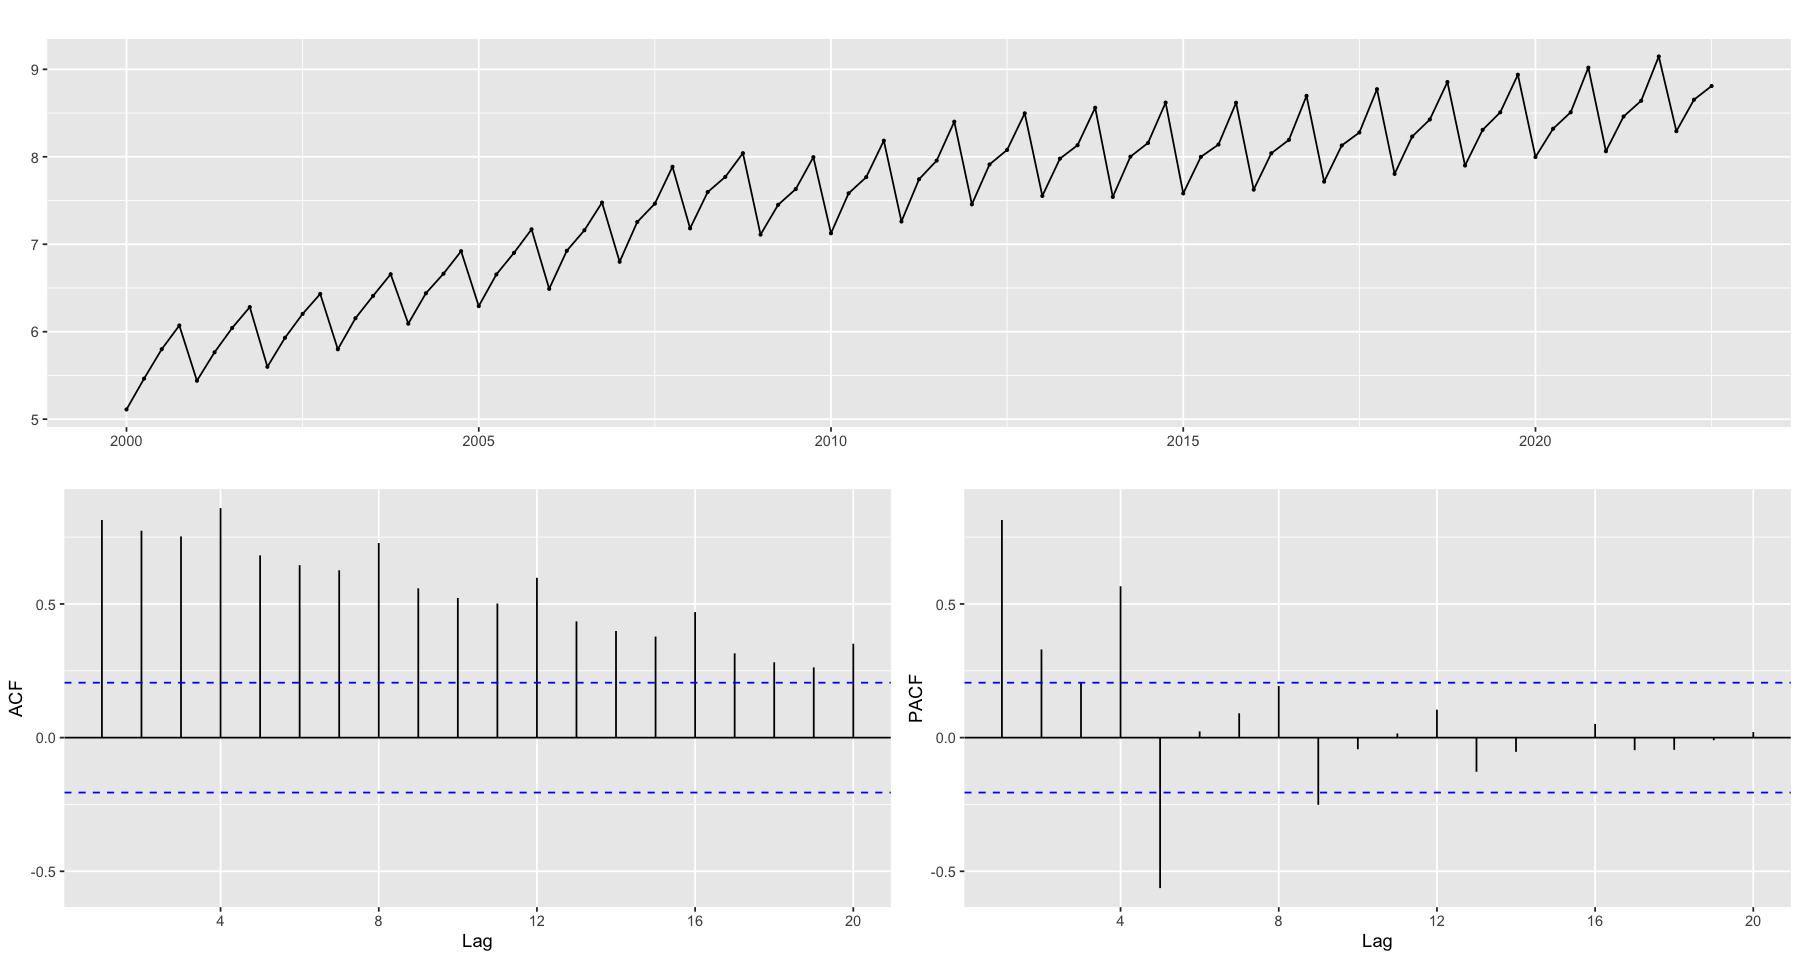

In [75]:
inv_log <- log(inv)
ggtsdisplay(inv_log, main="")

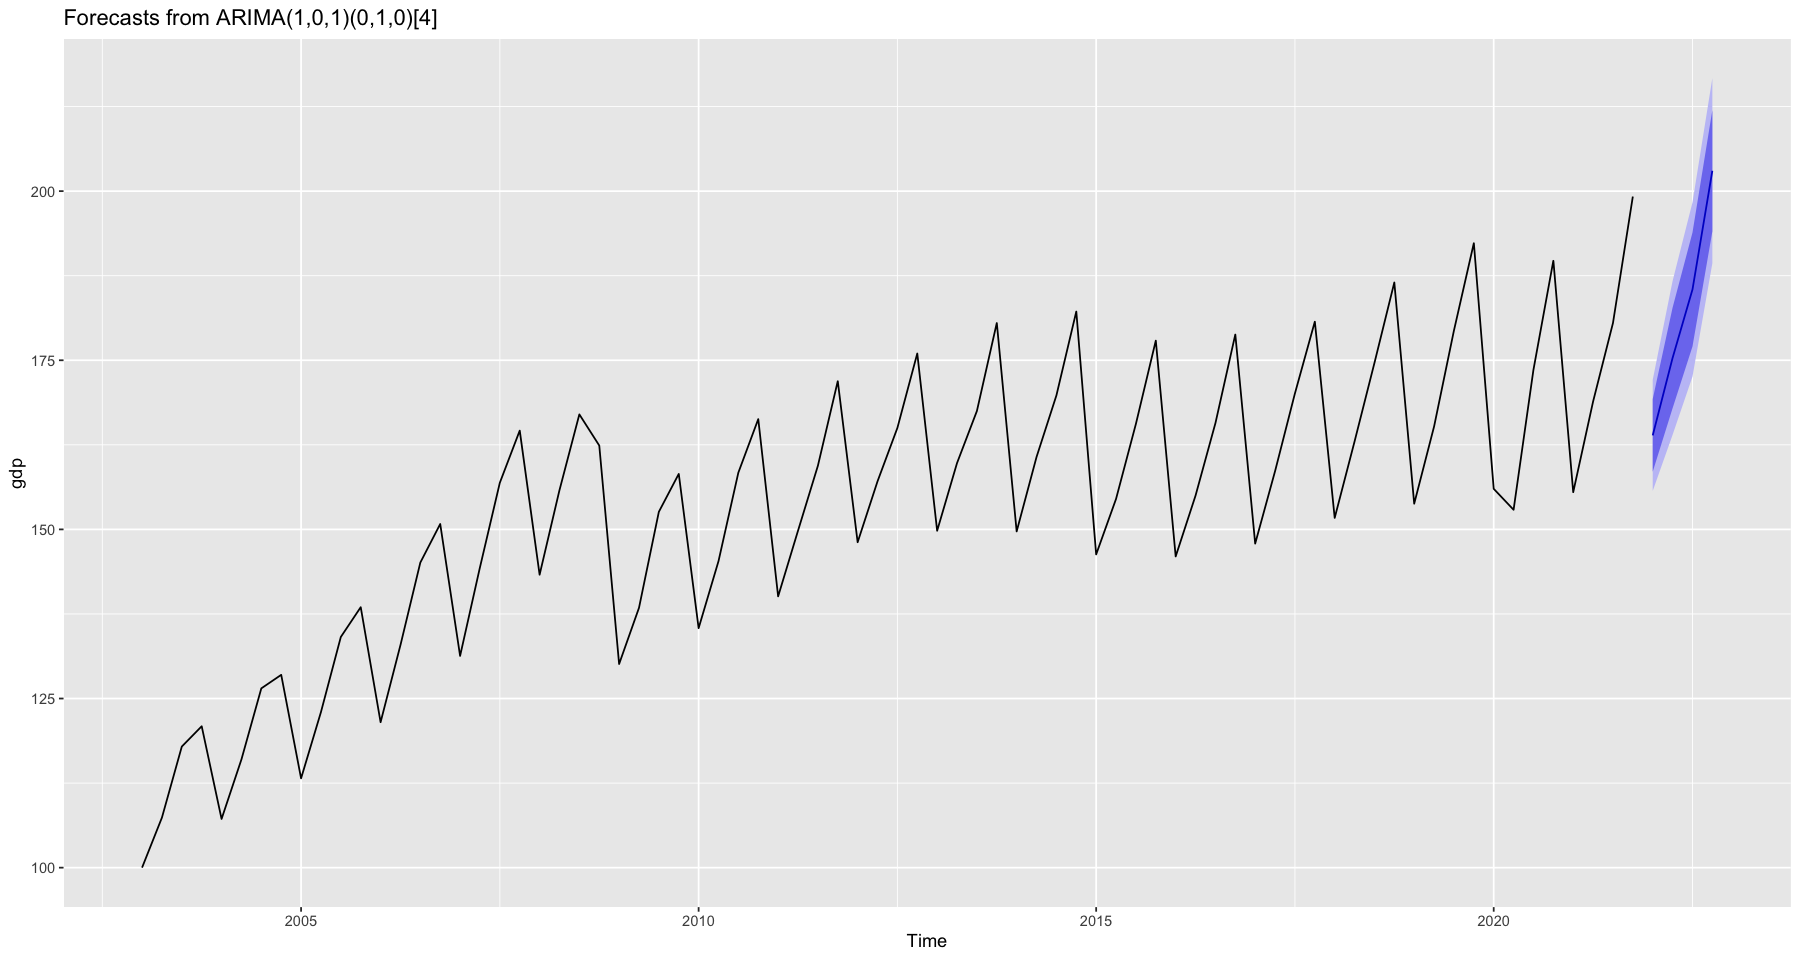

In [77]:
autoplot(future_gdp)

In [78]:
summary(ur.df(inv_log))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8674 -0.1724  0.2791  0.3856  0.5518 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
z.lag.1     0.005719   0.006499   0.880    0.381    
z.diff.lag -0.478392   0.094484  -5.063 2.28e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4625 on 87 degrees of freedom
Multiple R-squared:  0.2285,	Adjusted R-squared:  0.2107 
F-statistic: 12.88 on 2 and 87 DF,  p-value: 1.258e-05


Value of test-statistic is: 0.8799 

Critical values for test statistics: 
     1pct  5pct 10pct
tau1 -2.6 -1.95 -1.61


In [79]:
summary(ur.df(inv_log, type='trend', lags = 8, selectlags = "BIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.155610 -0.021348 -0.002241  0.022789  0.135586 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.3396120  0.1367271   2.484 0.015292 *  
z.lag.1     -0.0459728  0.0222639  -2.065 0.042485 *  
tt           0.0008681  0.0007422   1.170 0.245944    
z.diff.lag1  0.0654644  0.1094847   0.598 0.551736    
z.diff.lag2  0.0394690  0.1043170   0.378 0.706264    
z.diff.lag3 -0.2304854  0.0592848  -3.888 0.000221 ***
z.diff.lag4  0.7715459  0.0596101  12.943  < 2e-16 ***
z.diff.lag5 -0.2605488  0.1080456  -2.411 0.018404 *  
z.diff.lag6 -0.2470660  0.1136280  -2.174 0.032921 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard er

In [80]:
hegy.test(inv_log,  deterministic = c(1,1,1))


	HEGY test for unit roots

data:  inv_log

      statistic p-value    
t_1     -1.9028  0.6121    
t_2     -2.1837  0.1816    
F_3:4   33.2896       0 ***
F_2:4   27.4989       0 ***
F_1:4   22.9737       0 ***
---
Signif. codes: 0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1 

Deterministic terms: constant + trend + seasonal dummies 
Lag selection criterion and order: fixed, 0
P-values: based on response surface regressions 

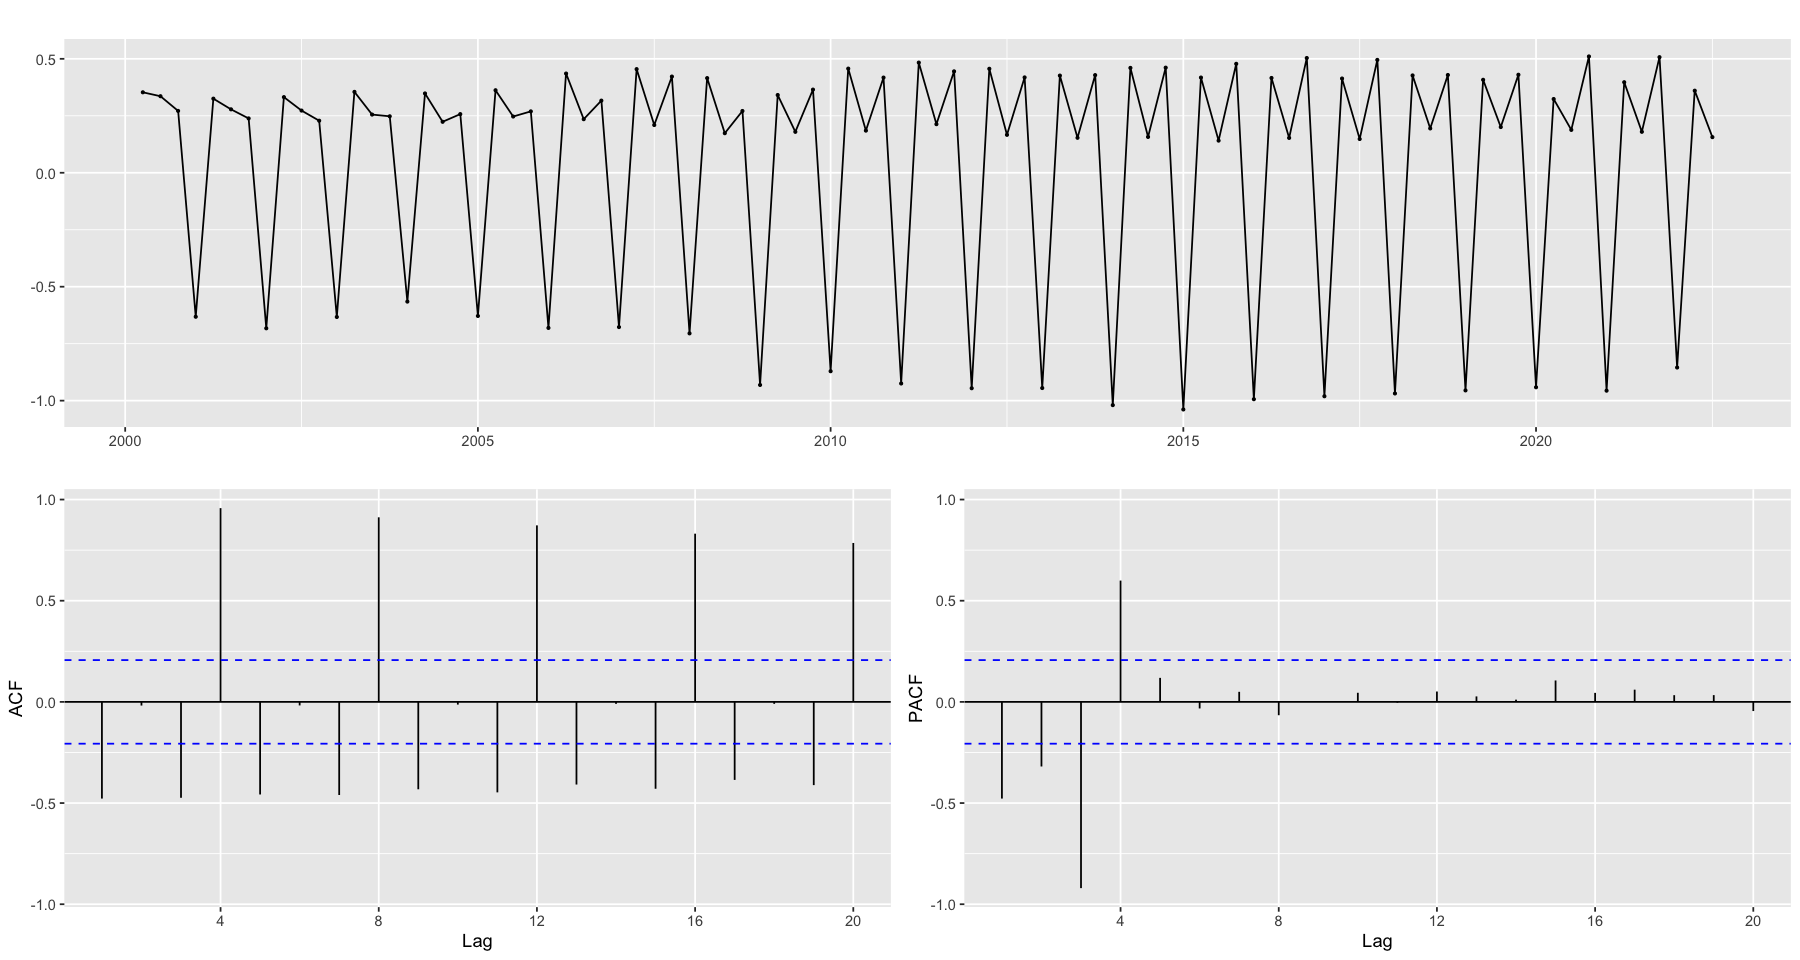

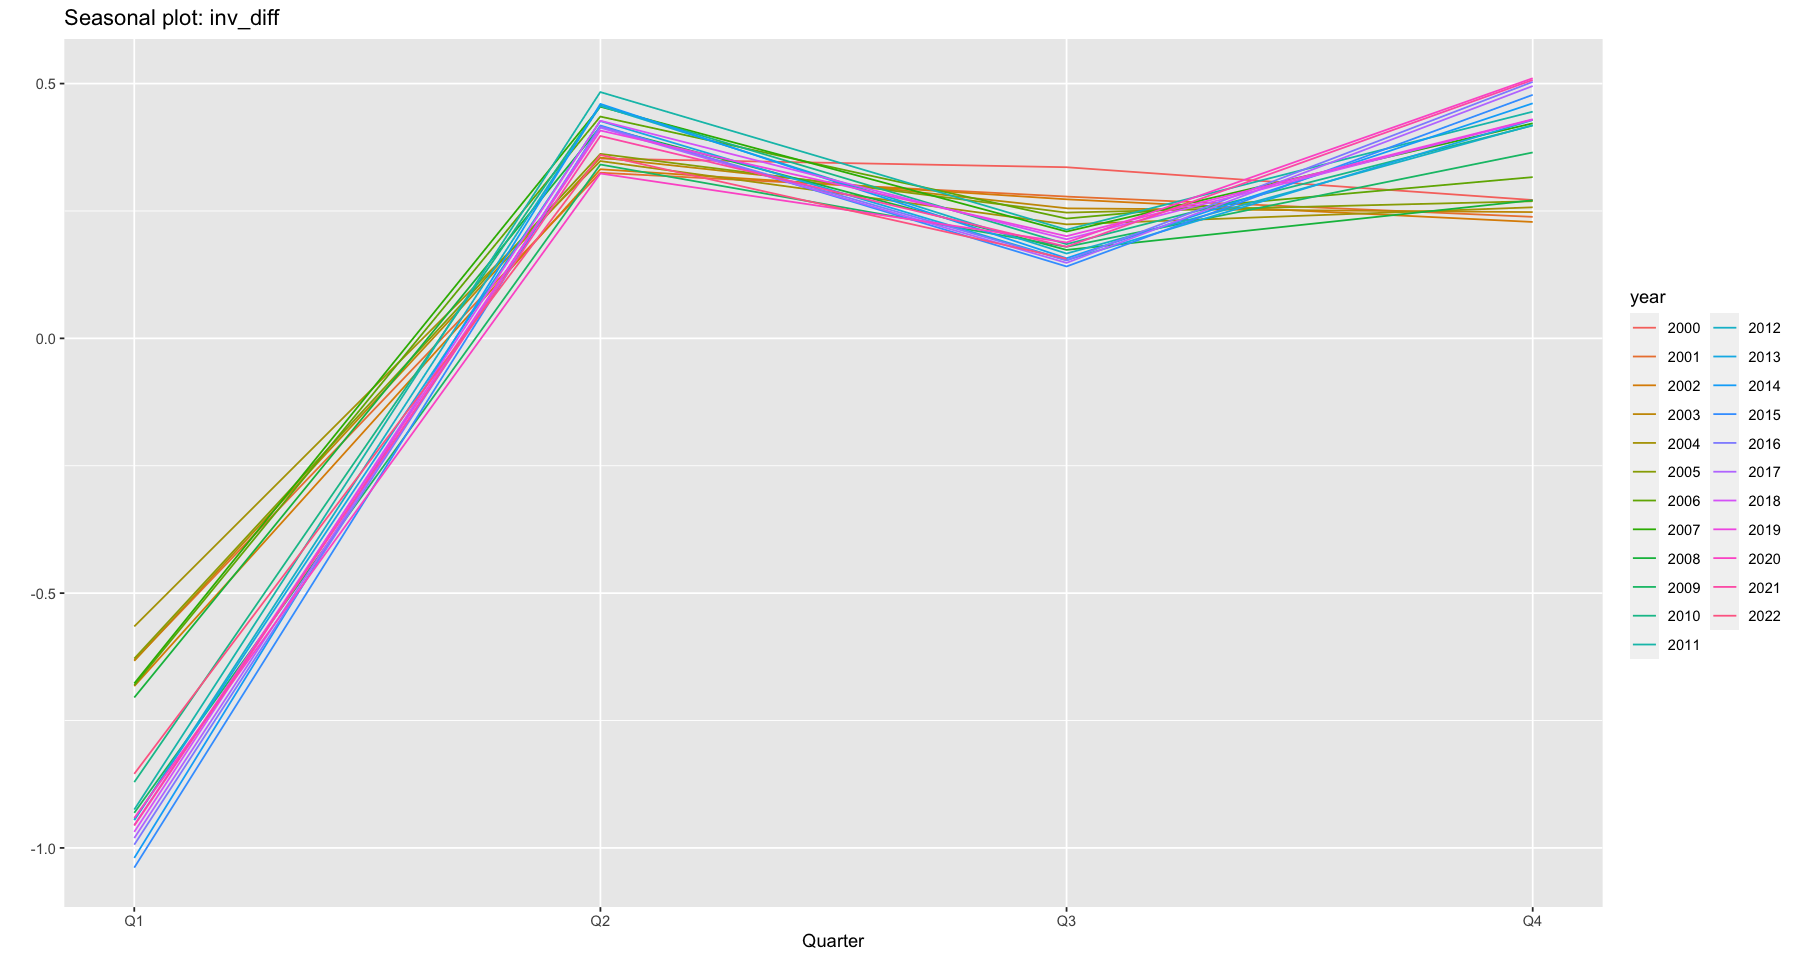

In [81]:
inv_diff <- diff(inv_log) # взяв первую разность, мы не решили проблему с нестационарностью, остался сезонный едичный корень 
ggtsdisplay(inv_diff) 
ggseasonplot(inv_diff)  

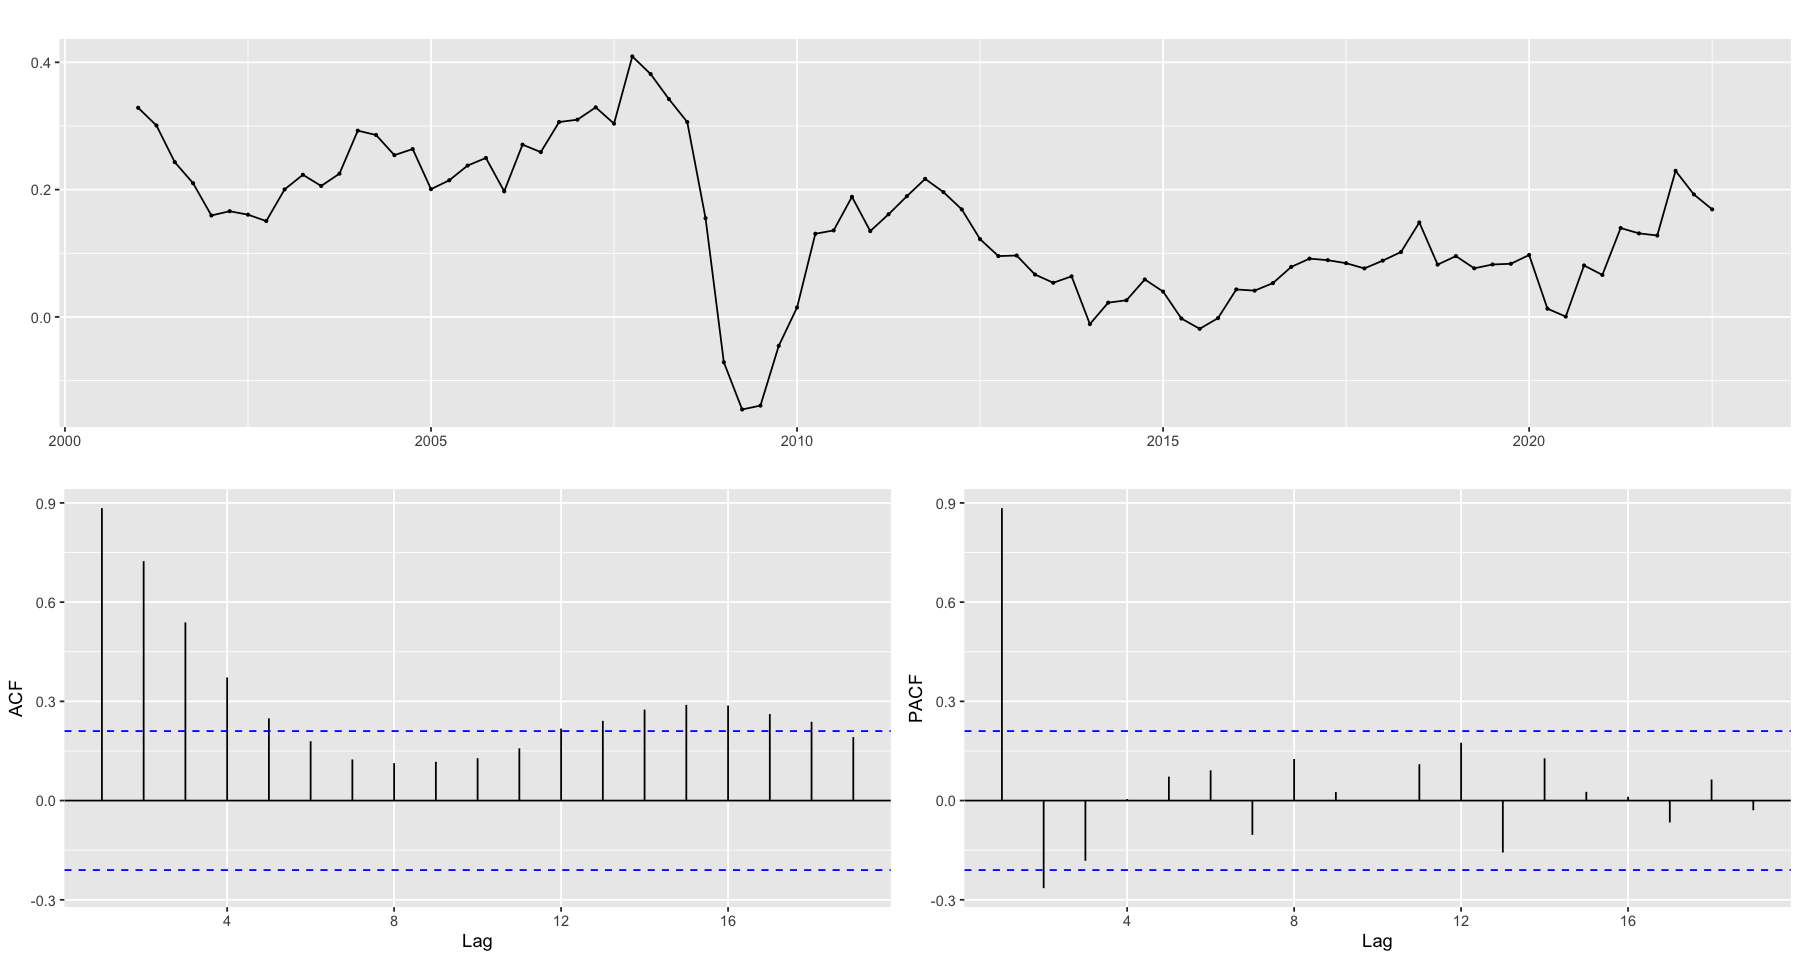

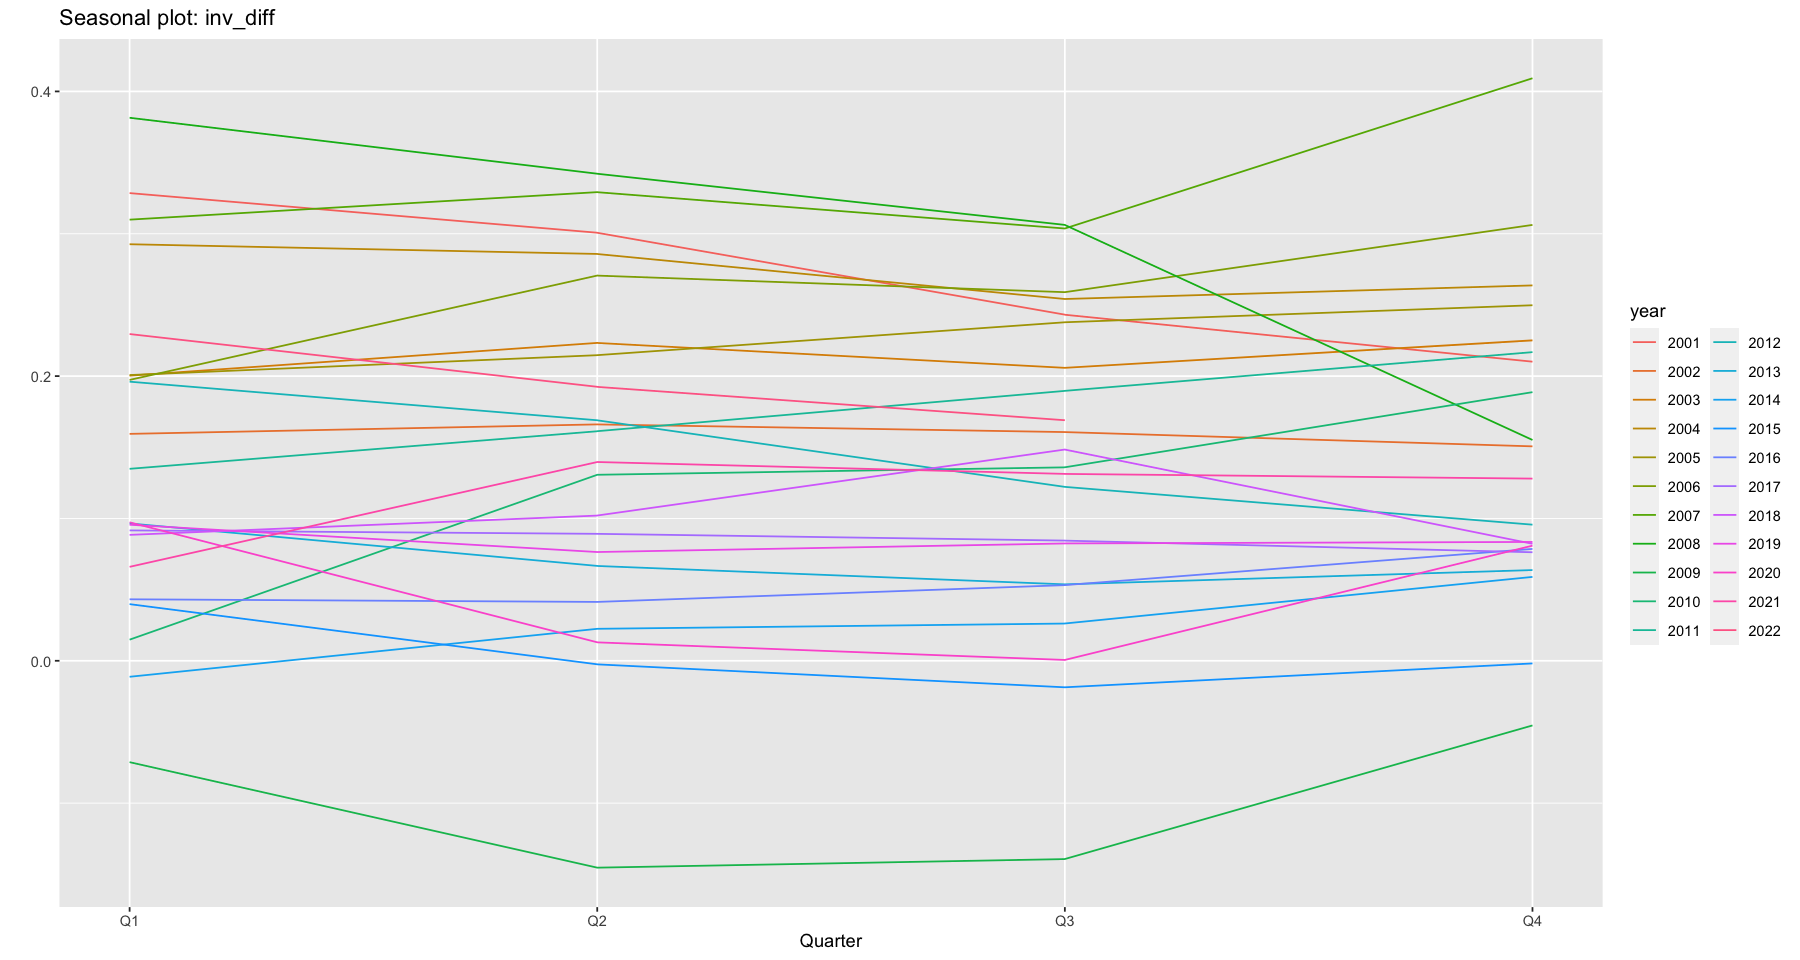

In [82]:
inv_diff <- diff(inv_log, 4)
ggtsdisplay(inv_diff)
ggseasonplot(inv_diff)  

In [83]:


summary(ur.df(inv_diff, type='none', lags = 8, selectlags = "BIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17779 -0.01552  0.00760  0.03287  0.12963 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)  
z.lag.1    -0.05716    0.03236  -1.766   0.0813 .
z.diff.lag  0.26234    0.11020   2.381   0.0198 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05006 on 76 degrees of freedom
Multiple R-squared:  0.09153,	Adjusted R-squared:  0.06762 
F-statistic: 3.829 on 2 and 76 DF,  p-value: 0.02605


Value of test-statistic is: -1.7664 

Critical values for test statistics: 
     1pct  5pct 10pct
tau1 -2.6 -1.95 -1.61


In [84]:
model_inv <- auto.arima(inv_log) 
summary(model_inv)

Series: inv_log 
ARIMA(1,1,0)(0,1,0)[4] 

Coefficients:
         ar1
      0.2414
s.e.  0.1042

sigma^2 = 0.002437:  log likelihood = 137.2
AIC=-270.4   AICc=-270.26   BIC=-265.49

Training set error measures:
                      ME       RMSE        MAE         MPE      MAPE      MASE
Training set -0.00145304 0.04771265 0.03446141 -0.02713162 0.4607345 0.2249543
                    ACF1
Training set -0.02636818

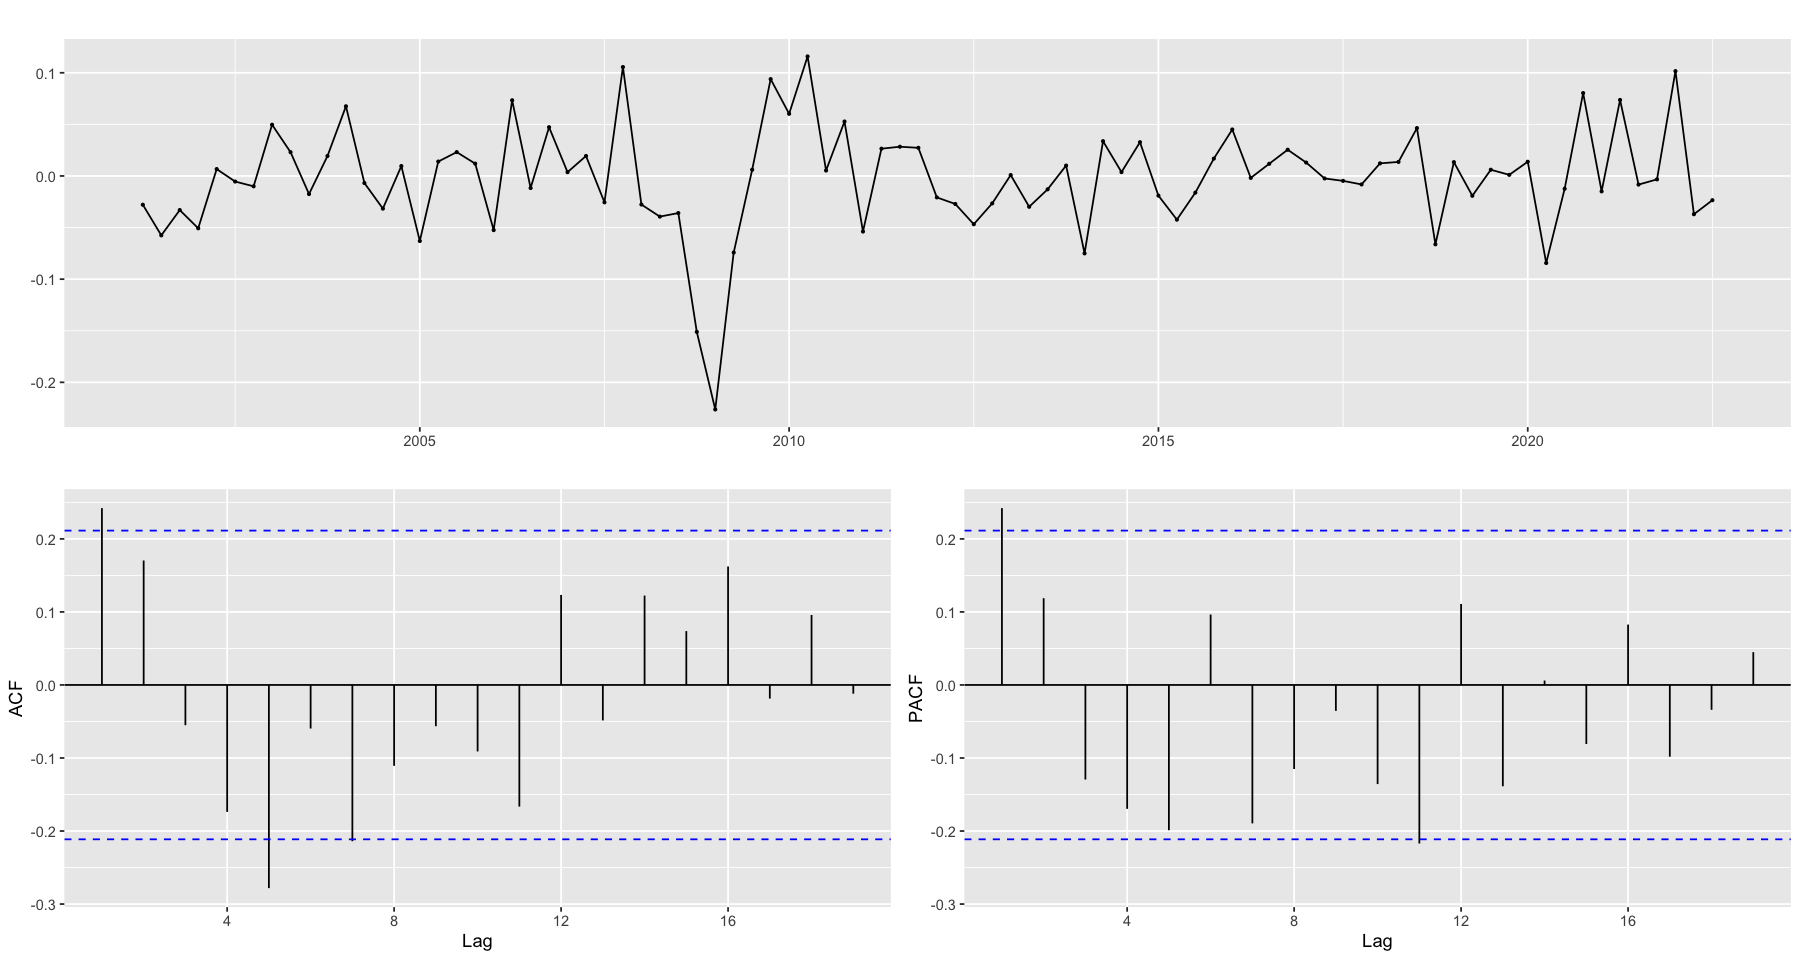

In [85]:
ggtsdisplay(diff(diff(inv_log,4))) # тест на 1 корень  показал, что надо брать первую разность, но по полученнным ACF, PACF, можно предположить, что это ARMA(1,1), но лучше модель будет подобранная по auto.arima ARMA(2,2)SARMA(0,1) (лучше по качеству остатков)  

In [86]:
model_inv <- auto.arima(inv_log) 
summary(model_inv)

Series: inv_log 
ARIMA(1,1,0)(0,1,0)[4] 

Coefficients:
         ar1
      0.2414
s.e.  0.1042

sigma^2 = 0.002437:  log likelihood = 137.2
AIC=-270.4   AICc=-270.26   BIC=-265.49

Training set error measures:
                      ME       RMSE        MAE         MPE      MAPE      MASE
Training set -0.00145304 0.04771265 0.03446141 -0.02713162 0.4607345 0.2249543
                    ACF1
Training set -0.02636818

In [87]:
model_inv <- auto.arima(inv_diff) 
summary(model_inv)

Series: inv_diff 
ARIMA(1,1,0) 

Coefficients:
         ar1
      0.2414
s.e.  0.1042

sigma^2 = 0.002436:  log likelihood = 137.2
AIC=-270.4   AICc=-270.26   BIC=-265.49

Training set error measures:
                       ME       RMSE        MAE      MPE     MAPE      MASE
Training set -0.001443617 0.04878058 0.03584216 26.86662 93.94028 0.4396351
                   ACF1
Training set -0.0279003

In [88]:
model_inv <- Arima(inv_log, order = c(2, 1, 1), seasonal = c(0, 1, 1), lambda = 0 )
summary(model_inv)

Series: inv_log 
ARIMA(2,1,1)(0,1,1)[4] 
Box Cox transformation: lambda= 0 

Coefficients:
          ar1     ar2     ma1     sma1
      -0.6162  0.2889  0.8538  -0.2852
s.e.   0.1467  0.1043  0.1157   0.1333

sigma^2 = 4.357e-05:  log likelihood = 311.76
AIC=-613.52   AICc=-612.77   BIC=-601.25

Training set error measures:
                       ME       RMSE        MAE         MPE      MAPE      MASE
Training set -0.003579761 0.04672032 0.03446491 -0.05480799 0.4610248 0.2249772
                     ACF1
Training set -0.009296106


	Ljung-Box test

data:  Residuals from ARIMA(2,1,1)(0,1,1)[4]
Q* = 7.4574, df = 4, p-value = 0.1136

Model df: 4.   Total lags used: 8



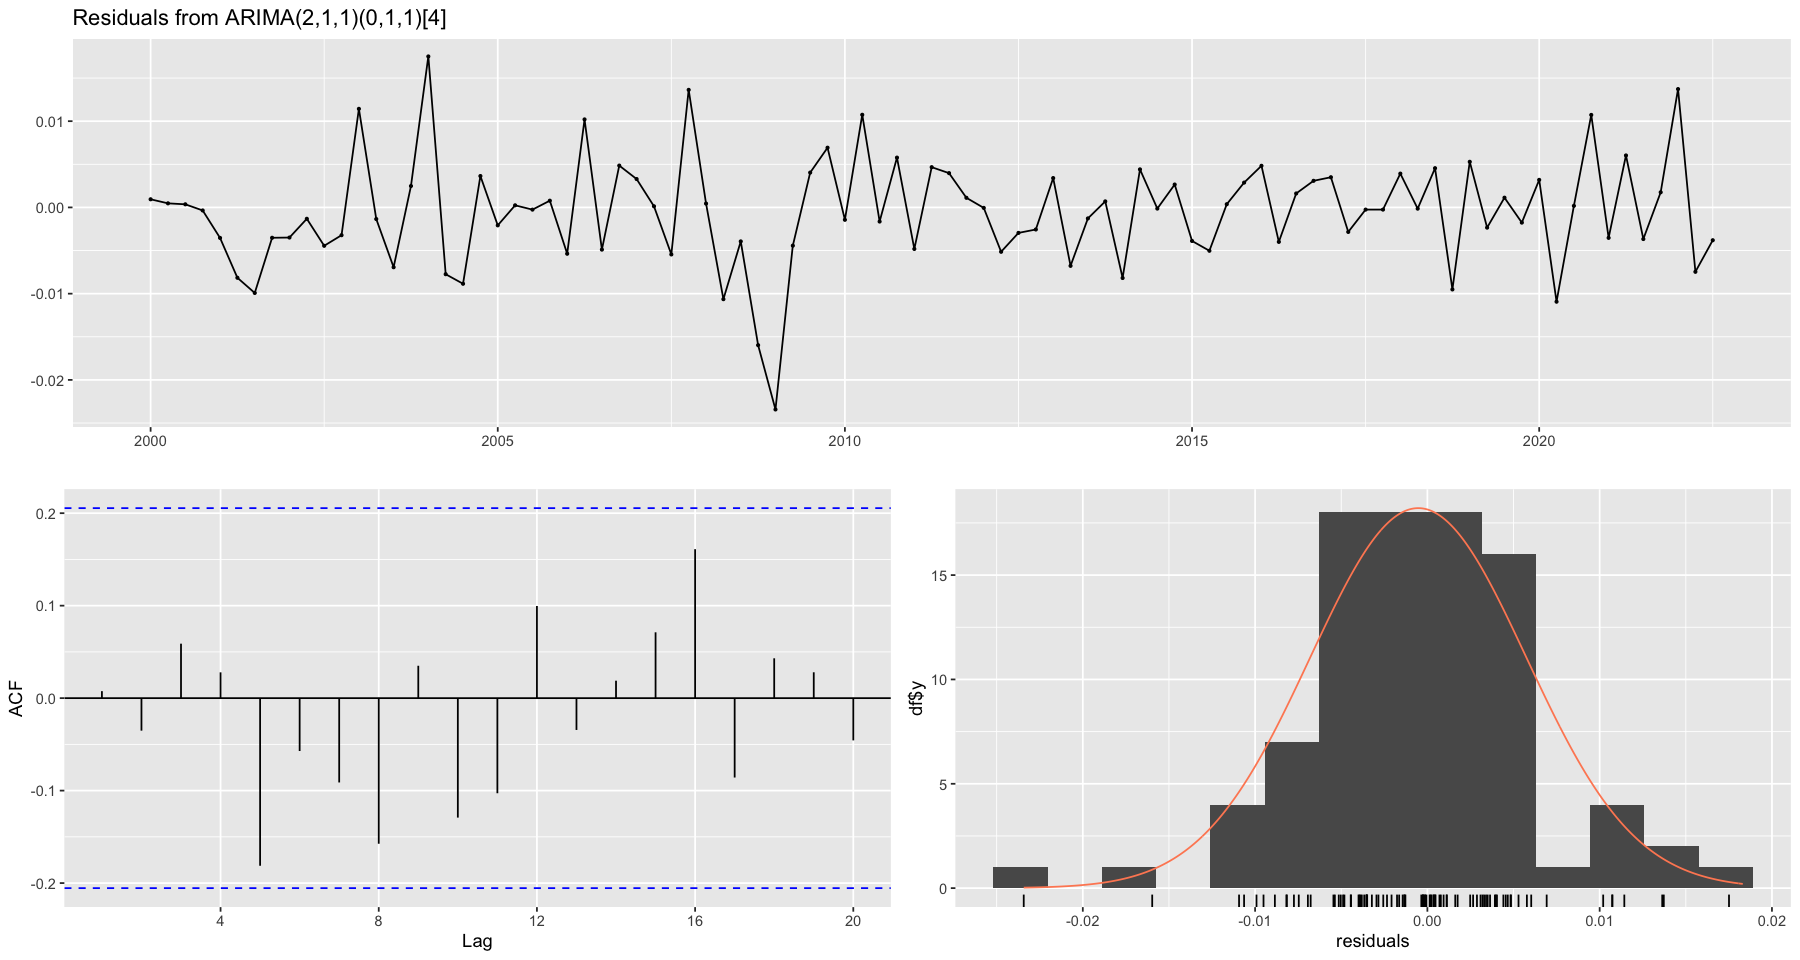

In [89]:
checkresiduals(model_inv)

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2022 Q4       9.302674 9.224313 9.381702 9.183098 9.423808
2023 Q1       8.402607 8.290265 8.516471 8.231404 8.577370
2023 Q2       8.770322 8.615440 8.927989 8.534560 9.012597
2023 Q3       8.943453 8.755729 9.135203 8.657954 9.238367

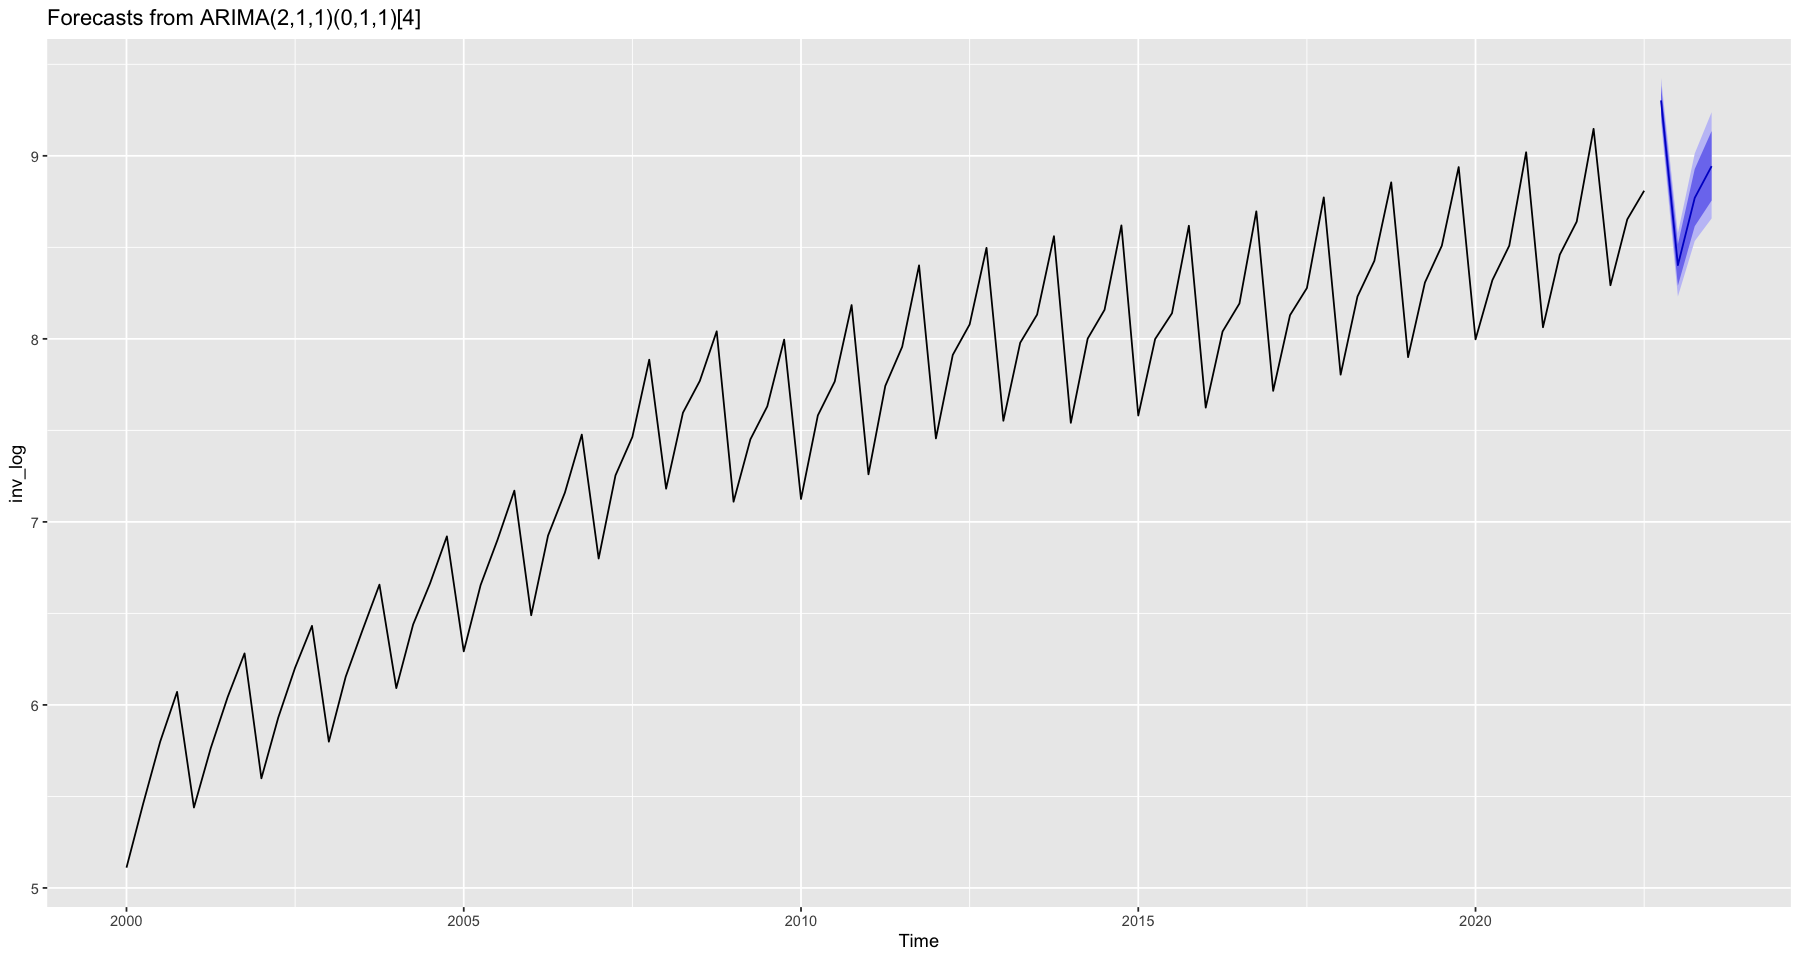

In [90]:
future_inv <- forecast(model_inv, h = 4)
future_inv
autoplot(future_inv)